In [59]:
%pylab inline
import uproot
import awkward as ak
import sys
sys.path.append("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/Preselection/plots_and_tables/")
import plotter
import pandas as pd
import mplhep
plt.style.use(mplhep.style.CMS)
from yahist import Hist1D

Populating the interactive namespace from numpy and matplotlib


In [2]:
tau_flat_df = pd.read_pickle("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/MVAs/flat_higgs_20210602_higgs_200_4_layers_400_epochs.pkl")

In [3]:
tau_flat_df.columns

Index(['nJet', 'MET_pt', 'MET_phi', 'MET_covXX', 'MET_covXY', 'MET_covYY',
       'ele1_pt', 'ele1_eta', 'ele1_phi', 'ele1_charge', 'ele2_pt', 'ele2_eta',
       'ele2_phi', 'ele2_charge', 'ele1_tightId', 'ele2_tightId', 'muon1_pt',
       'muon1_eta', 'muon1_phi', 'muon1_mass', 'muon2_pt', 'muon2_eta',
       'muon2_phi', 'muon2_mass', 'muon1_tightId', 'muon2_tightId', 'tau1_pt',
       'tau1_eta', 'tau1_phi', 'tau1_mass', 'tau2_pt', 'tau2_eta', 'tau2_phi',
       'tau2_mass', 'tau1_id_vs_e', 'tau1_id_vs_m', 'tau1_id_vs_j',
       'tau2_id_vs_e', 'tau2_id_vs_m', 'tau2_id_vs_j', 'n_tau', 'n_electrons',
       'n_muons', 'jet1_pt', 'jet1_eta', 'jet1_id', 'jet1_bTagDeepFlavB',
       'jet2_pt', 'jet2_eta', 'jet2_id', 'jet2_bTagDeepFlavB',
       'Category_pairsLoose', 'm_tautau_collinear', 'decay_1_pt',
       'decay_1_eta', 'decay_1_phi', 'decay_1_energy', 'decay_1_mass',
       'decay_1_pdgId', 'decay_2_pt', 'decay_2_eta', 'decay_2_phi',
       'decay_2_energy', 'decay_2_mass', 'decay_

In [4]:
gen_hist = Hist1D(tau_flat_df["gen_higgs_mass"].values, bins = np.arange(80, 145, 1))
nn_hist = Hist1D(tau_flat_df["nn_ditau_mass"].values, bins = np.arange(80, 145, 1))

<AxesSubplot:>

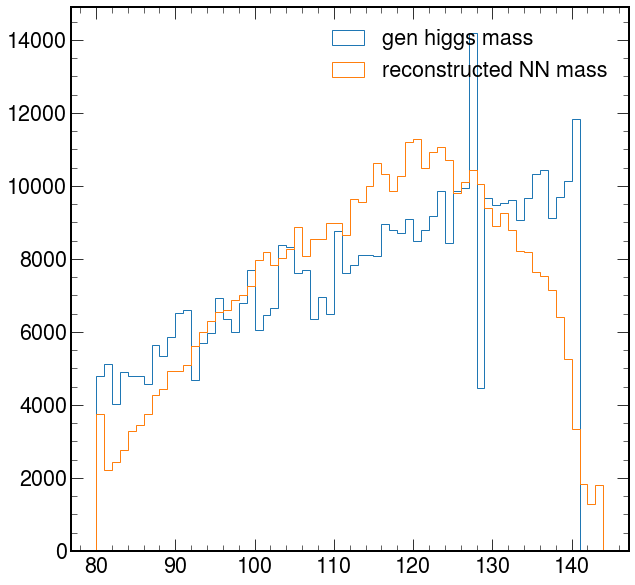

In [5]:
plt.subplots(1,1)

gen_hist.plot(label = "gen higgs mass")
nn_hist.plot(label = "reconstructed NN mass")

In [6]:
gen_hist = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "gen_higgs_mass"].values, bins = np.arange(80, 145, 1))
nn_hist = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "nn_ditau_mass"].values, bins = np.arange(80, 145, 1))

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


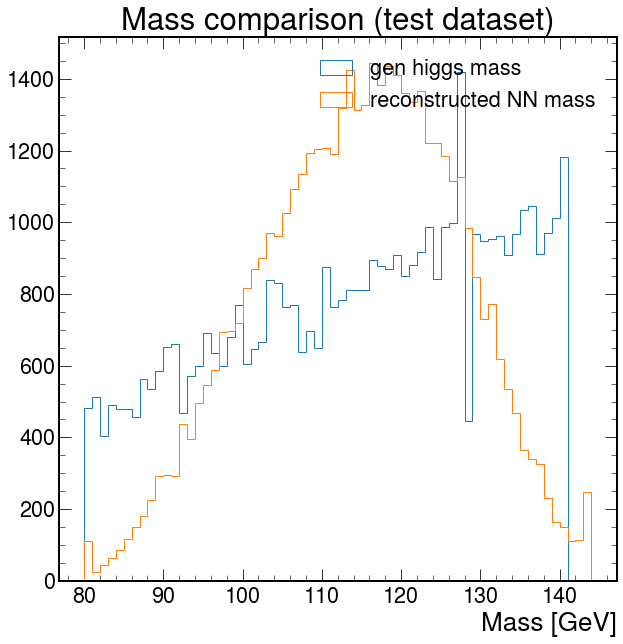

In [8]:
plt.subplots(1,1)

gen_hist.plot(label = "gen higgs mass")
nn_hist.plot(label = "reconstructed NN mass")
plt.title("Mass comparison (test dataset)")
plt.xlabel("Mass [GeV]")
plt.savefig("paper_reproduction_higgs_mass.pdf")

In [12]:
gen_hist = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 0, "gen_higgs_mass"].values, bins = np.arange(80, 145, 1))
nn_hist = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 0, "nn_ditau_mass"].values, bins = np.arange(80, 145, 1))

In [9]:
gen_hist.integral

47010.0

In [10]:
nn_hist.integral

47010.0

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


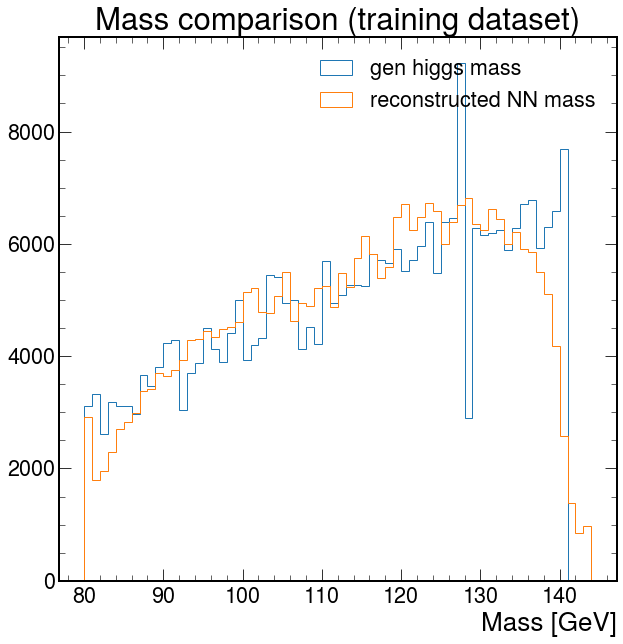

In [14]:
plt.subplots(1,1)

gen_hist.plot(label = "gen higgs mass")
nn_hist.plot(label = "reconstructed NN mass")
plt.title("Mass comparison (training dataset)")
plt.xlabel("Mass [GeV]")
plt.savefig("paper_reproduction_higgs_mass_training.pdf")

### Loss plots

In [15]:
val_loss = np.loadtxt("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/MVAs/output/singleH_20210602_hidden_200_4_layers_l2_0_128_no_early_stopping_400_epochs_65pc_training_val_loss.txt")
train_loss = np.loadtxt("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/MVAs/output/singleH_20210602_hidden_200_4_layers_l2_0_128_no_early_stopping_400_epochs_65pc_training_train_loss.txt")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


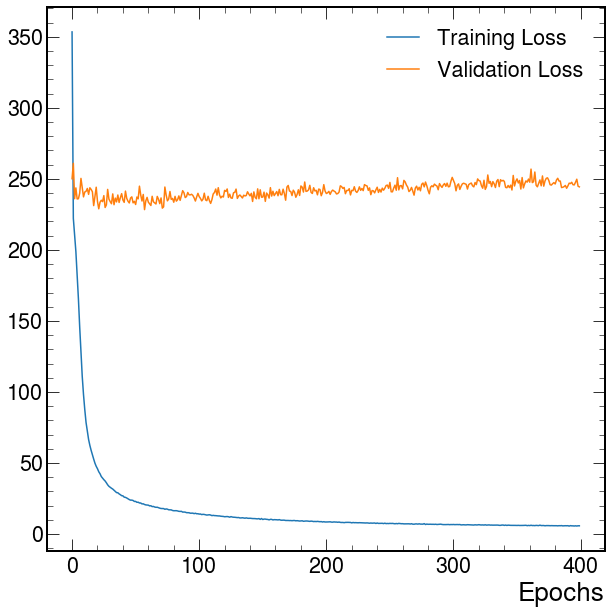

In [20]:
plot(train_loss, label = "Training Loss")
plot(val_loss, label = "Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.savefig("paper_reproduction_train_and_val_loss.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


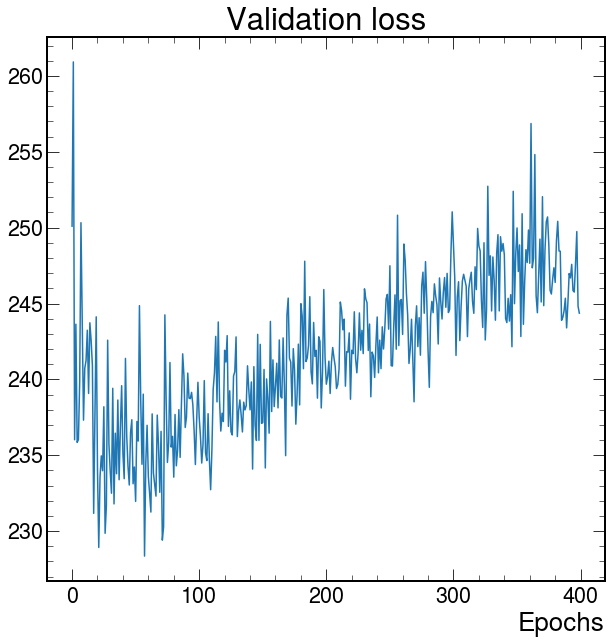

In [23]:
plot(val_loss, label = "Validation Loss")
plt.title("Validation loss")
plt.xlabel("Epochs")
plt.savefig("paper_reproduction_val_loss.pdf")

### Regression BDT check!

In [2]:
tau_flat_df = pd.read_pickle("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/MVAs/flat_higgs_20210609_bdt_predictions.pkl")

In [3]:
tau_flat_df.columns

Index(['nJet', 'MET_pt', 'MET_phi', 'MET_covXX', 'MET_covXY', 'MET_covYY',
       'ele1_pt', 'ele1_eta', 'ele1_phi', 'ele1_charge', 'ele2_pt', 'ele2_eta',
       'ele2_phi', 'ele2_charge', 'ele1_tightId', 'ele2_tightId', 'muon1_pt',
       'muon1_eta', 'muon1_phi', 'muon1_mass', 'muon2_pt', 'muon2_eta',
       'muon2_phi', 'muon2_mass', 'muon1_tightId', 'muon2_tightId', 'tau1_pt',
       'tau1_eta', 'tau1_phi', 'tau1_mass', 'tau2_pt', 'tau2_eta', 'tau2_phi',
       'tau2_mass', 'tau1_id_vs_e', 'tau1_id_vs_m', 'tau1_id_vs_j',
       'tau2_id_vs_e', 'tau2_id_vs_m', 'tau2_id_vs_j', 'n_tau', 'n_electrons',
       'n_muons', 'jet1_pt', 'jet1_eta', 'jet1_id', 'jet1_bTagDeepFlavB',
       'jet2_pt', 'jet2_eta', 'jet2_id', 'jet2_bTagDeepFlavB',
       'Category_pairsLoose', 'm_tautau_collinear', 'decay_1_pt',
       'decay_1_eta', 'decay_1_phi', 'decay_1_energy', 'decay_1_mass',
       'decay_1_pdgId', 'decay_2_pt', 'decay_2_eta', 'decay_2_phi',
       'decay_2_energy', 'decay_2_mass', 'decay_

In [4]:
gen_hist = Hist1D(tau_flat_df["gen_higgs_mass"].values, bins = np.arange(80, 145, 1))
nn_hist = Hist1D(tau_flat_df["bdt_ditau_mass"].values, bins = np.arange(80, 145, 1))
nn_hist_weighted = Hist1D(tau_flat_df["bdt_ditau_mass_weighted"].values, bins = np.arange(80, 145, 1))

<AxesSubplot:>

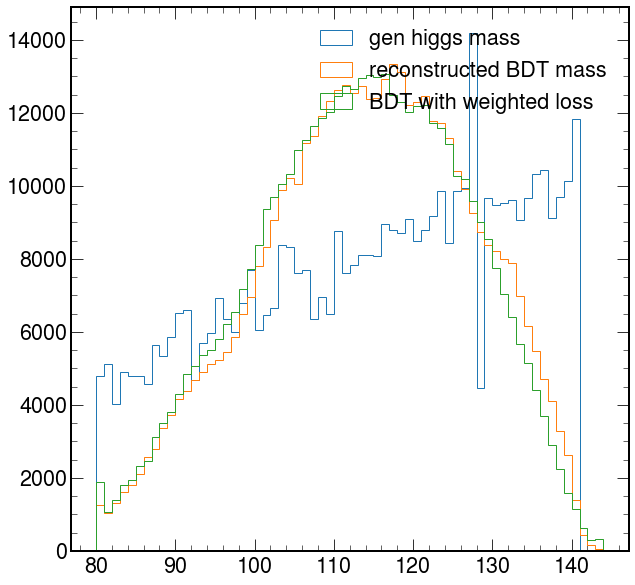

In [5]:
plt.subplots(1,1)

gen_hist.plot(label = "gen higgs mass")
nn_hist.plot(label = "reconstructed BDT mass")
nn_hist_weighted.plot(label = "BDT with weighted loss")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


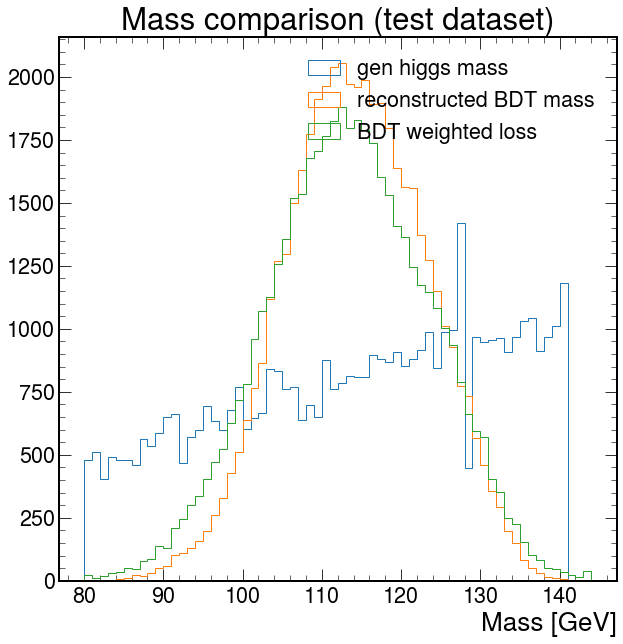

In [7]:
gen_hist_test = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "gen_higgs_mass"].values, bins = np.arange(80, 145, 1))
nn_hist_test = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "bdt_ditau_mass"].values, bins = np.arange(80, 145, 1))
nn_hist_test_weighted = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "bdt_ditau_mass_weighted"].values, bins = np.arange(80, 145, 1))
plt.subplots(1,1)

gen_hist_test.plot(label = "gen higgs mass")
nn_hist_test.plot(label = "reconstructed BDT mass")
nn_hist_test_weighted.plot(label = "BDT weighted loss")
plt.title("Mass comparison (test dataset)")
plt.xlabel("Mass [GeV]")
plt.savefig("BDT_higgs_mass.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


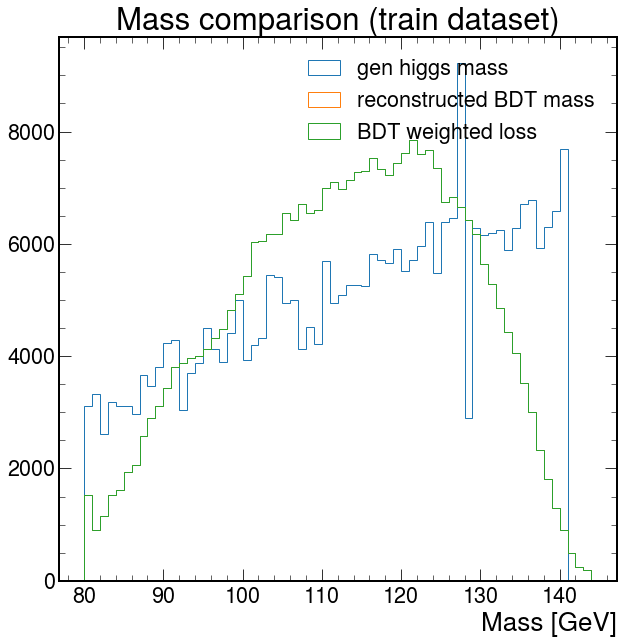

In [8]:
gen_hist_train = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 0, "gen_higgs_mass"].values, bins = np.arange(80, 145, 1))
nn_hist_train = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 0, "bdt_ditau_mass"].values, bins = np.arange(80, 145, 1))
nn_hist_train = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 0, "bdt_ditau_mass_weighted"].values, bins = np.arange(80, 145, 1))

plt.subplots(1,1)

gen_hist_train.plot(label = "gen higgs mass")
nn_hist_train.plot(label = "reconstructed BDT mass")
nn_hist_train.plot(label = "BDT weighted loss")
plt.title("Mass comparison (train dataset)")
plt.xlabel("Mass [GeV]")data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAm8AAAKECAYAAABRtd3JAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAACUG0lEQVR4nOzdd5xU1f3/8dcHpC6wNEEWRBALIouAKF0QlcWCQmyxgsaAJSaxxlgXUUOM/vwmtggxisZgArFATCAxBiSIBQVE7Iqirg0EFKTz+f1x7wyzu9O27+y8n4/HPGb3nnPvPffM7M5nzj3F3B0RERERyQz1aroAIiIiIpI+BW8iIiIiGUTBm4iIiEgGUfAmIiIikkEUvImIiIhkEAVvIiIiIhlEwVsWMbOHzMxjHreX4xgXlzjGf6uirCJSucysoZm9bWarzKxBTZentov5H/dQTZelLjOz88N6Premy5JJFLxlt9PKsc+plV4KkUpkZjfpy0Vc1wAHApPcfXtsgpn9LKy3cTVTtNTM7JCwjDeZ2T41XZ6KMrOTItdT02WpaineX48A7wN3mFnrai5axlLwlt32MbPD081sZu2BI6qwPCJSBcxsP+CXwDvAo3Gy/BwoBMZXW6HKrjdBGQuBLjVYjsoyht3XU9f9nATvL3ffAUwC9gSmVGehMpmCt+y1M3w+vQz7jCV4z3j4EJHMcCfQGJjs7jtTZRapZn8G3gMuMLO+NV2YTKDgLXvND59PNTNLc5/ILdPFwNZKL5FIJXD3Se5u4ePImi5PTTOzbsBo4FvgbzVcHJFS3H0Xwe1TAy6t4eJkBAVv2Wtm+Lw3MCBVZjPbExgW/vrXqiqUiFS6Swg+FP/m7ltqujAiCTwWPv/QzNrWaEkygIK37DWX4Js4pDdwYSxQn+B2aVrf3s1sXzP7rZktNrNPzWyLma0Of7/DzLqkcYzhZvYXM1tqZt+a2Vdm9qKZ3WNme6fYt2XYSfY5M/vYzL43s3fM7J9m9sMytDgmO0dbM5tkZq+a2Toz22BmS8zsYTM7OI39+5vZNDN7z8w2mdl3ZvaumU01s/4p9o10yp8Yc6yZZvZZWNerwvpvE7NPRzO728w+MLPN4evyrJkdl+Ackc7/n4e/72FmE81skZmtDcv8tpn9X9ivKtX17mVmt5rZ/8zso7CcRWb2spn93sx6Jtm3ZFkamdmNZvahme00s5PC7cNi6iZuB3wz29/M7g/fi1+G763l4Xstab2H+zc1s8vMbH64/zYz+8LM/mtmPzezpkn2jYz6Xhr+bmZ2lpktCN/f34Xvp9+aWbtUZUlVTuC88Nc/lUjbJ1JP7O5DNjyNuhtqZn80s/fDv6kvLfibvNnMOqRRpjLVfaS+gIdjNs8Py7gqdS3ELUMHM5tiZq+H9b3BzJaF76fcNI9R34L/I/80szfD46w3szfMbI6ZnWJm9ePstyq8nvEx2xKObDWzxuHf3H8s+P+1yczWhHU208xGmiX/XxZe7x1m9rwF/x82mdlKM3vazArSvN4yve5lfX+5+yrgBYLb+z9Kp0xZzd31yJIH8BC7+6u1J+i47MCngKXY999h3kXh75vD3/+bIP9lwI6Y88V77ADGJdi/EfDPFPtvAc5MsP+JwPoU+78ENK1AfZ4AfJPi+n6TYN/6wL0pyufA/UD9BMeI5JkIXABsT3CM94A2wFBgbZJzXRPnHDeFaZ8TdChelOL1uCBJfZ0W5kl1zTck2D+2LE2B/5TY76Qw37CYbaXeX8DkNN6bdye5jn7AJyn2/xQ4LMXf4VKgIfB4kuN8C/SpwHv0h+FxvgHqlUjbJ8U1jCuRvyEwPcU+24AfJylPmeue4v+3Sj5WlaNOTga+S3LM1UDPmN8finOMPQkGf6R6Ly8FmpfYd1WS/A+VyHsA8EUa55kL7JHgeiey+/91osfTJd8fFX3dy/r+Cve5PExbWd73fLY89kCy2V+Bs4GOwGDgf/EyWdCEPTz8dWa8PCXyHwn8hiBAAXiWIFBaB7QDRhKMHKsPTDWzJe6+ssRhfg+MCn9eF573AyAHGAKMIAjwpprZK+7+Xsz5DyZogm8WbloYPtYRfAM8A2gNHA7cRfDPrUzMbBDwJET/hl4i+Nb4TXhtkZbKK81spbs/XOIQvwEuDn/eBSwIj+FhuY4kaBm/MDzOhCTFOYZg5Nr3YZneIvjw+WG4737AXwiCjlyCAOw5gn/KPwD2D49zk5n9yd0/jXOOPQheg0HApnD/lwn+QQ8PzxF5PT5392dK1NdBwB/DPJH6+i/wNbsDy6Fh2s1m9qK7/zvB9RpwH8F7YC3Ba/se8EbiKoqWYxxwffjrDuAp4PXw554E/TobAD8xsxfcfUaJ/TuG19483PRpeB1vAd0JXre9Cf6mnjOzQ9393SRF+g3BoKEigi9IbxPU5RkEAWpz4HEz6+HlG2gwInx+2YN+RbG+AX4S/nwzwd/Ee8Bvw20vlcj/J3b3e90APAO8CbQC+hP8XTYgeA/kuPv/xe5cgbr/E7CEoHvH2eG234Zl/S5VBZQow0CCv4XI/6ZPCF6/dwn+bo8ieP3+keQYBswgCKwgeA/PJAj69iCYjuUHBP+rehN8ATs75hA3Ebyu5xDUG+x+Hd6OOU8T4AmCL9oAHxP8fX8WHrsnwZfUhkABwWjOSP1GjnEUwZfEyF2TucArBH/DBxD8j8gJj/ML4FdxLrm8r3tZ318AL4bPPcxsL3f/Ik4eAWo8etSj+h6UbnlrxO7Wqd8l2e+CMM8uYO9wW8KWN4LAKZL/9ATHvDWmLD8tkdYmJm0l0DrO/tfE5Lm2RNrvYtImxtm3LbtbTjaToGUrRV1GWqB2Aj+Lk344wT9IJ/iAaRKTti/BN1UP6//4OPsfS/GWwyPj5In9FvsesH+J9DGU/rZ7SYk8TQiCsEj6ySXSbyqx/2qgZ4k8DQiCqUie5ZRoyS3xel+VoE5/HJPn/8VJj5RlV/j8JLBnnHzDYo4zrkTa6+H2jcChcfYdwu6WoX/FSX8w5thPAs1KpDcj6FYQybMgyd/hxvD5H0DLEnn2pXgr6cHl/Jt/P9x/Uop8q0jw9xymD48py9NAuzh5Yluivwe6VHLdj4spw7By1sfCmGP8hRIt7wSB2+sxeZzSrWH7x6S9DOTEOU9nghZiB75JUJbo/+ME6ceUqPNSLWtAn5j30Wtx0mez+//UcXHSDyBo3XXg3ap43dN5f8Xka8zuOwhnlOc1zpZHjRdAj2p8sUsEb+G2SHN4EYmbzeeFeV6I2ZYseFsZpi1OUpbYAG1aibRjY9IuTbB/y7AMm4FHS6RFWrDWkuB2MEGLR2T/A8tYj2Niypfs9tpVMfmGx2yPvU12VpL9z4zJNztOeuwHzBEJjrE8Js8jCfKcHJPnmhJpN5U4zyFJyvv3mHynlkh7Jtz+eZL96xF8s3fg33HSY8vyGdAwwXGGxeQbF7O9GcGHmBN03k9UjpfC98XHJbb3YHdw8XaSv5d6YXqkDH2T/B0WERPYl8j3y5h8Zf4gIwggIvuX+uAukTfhhytBS+cSdn+ZStjVgKDFKXLO/xezvUJ1H6aNizn2sHLUxwkx+7+cJF87giAkkvehEumnxqQVJDnO3TH5OsZJj74PEuwf+/8j4f8oYE6YZ3uctC/DtFeT7P/XsM43xb62lfG6p/P+ipP31TDv1LK+xtn00IAFiYwc7cDu21ZRFsx4Hbn1kvKWaWgiwTe28UnybIz5ueTt+9jbO53j7ezu6929Sfg4J8H+TQma6uPtf1XM/u8kKWc8kVuYuwhuuyYyi+C22qdAr5jtJ4TPHxAEcon8Bfgw/DnZlBdvufvzCdLejvn5vgR53oz5uVGCPADPuPvyJOk3x/xcchDMTQTviVEk4MFtve/DX1N16bjb3belyFPSToIPJIBOiTp5u3v/8H2xT4mk49l9u+1XXvo2ZGT/XcCvYzYle+1+7e6bE6Qti/m5YZJjJNI75ue3yrF/RD/g0PDne9z9+0QZ3f0Jgvc17O5qARWv+8pwQszPkxJlcvevCFpYE1lMcG3D2T3lUjzJ/sel48nwHMNS/I+KnCfeOSLv0T3NrHG8nd39tLDOc0q8tpXxupdH5P/RoUlzZTn1eZN/E9yea0nwgbugRPoYgveJEwQjKbl73L5zEeE/kV8kybKcYB65RsDl4Wil+9z9o3TOT/DtfQBBE/x8M7sWmFeOD/tEBobP77j7h4kyeTB6qtiI2HBUVk746788ST8md99pZs8SBIvNzKxd+MFSUsn+grFi/+GuSCNPMk8mS3T3l82sCMgjuO0Xm7Yk2b7hqLzxwF5pliVZEJmofJvN7HXgEILb2k+b2WRgiYdf+VOIHU37zxR558b83C1JvmR/K+m+LonE1uWaChxnUMzPXczskhT5I+U+xMzqu/vOSqj7yhB5/baR+vV7it39tYrxoE9ovH6hUWbWgwouJeju7xPc9k52nkEEt1cTeQk4ieD/0LNmdgPwfLL/OzEq/LqncY541obP7ZPmynIK3rKcu28zs6cIPjhPMbOflviji/wDesndPynLsc2sHkGLUy+CTrzdCPqLHETQ1ypRmb4ws6sI+q7VI7h9cJWZvUPQZ2URMNcTd2YtJPiW3Y2gU+9sYJOZLQr3nU8warbM/1zMrBlBoAtB/6+yiv0g/yiN/B/H/LwvEC942xhnWynuvimdfEmsSjNPHkkClnDwQm+CDv7dCD5Ue7B7EEA6Pi9D3lgTCF7/JgQT144GvjCzyPvqWS89eCYick2bEwTRsb5g9xeQfZPk+yBJWkVFgrft7l6mjv0lxH4BuboM+9Uj6NQeCRwrUveVITIw56NEraYx0nmvY8E0PIcTvH/3I3itD6LEl7aKMrM84LDw2N3CRw9SBzg/J+hL2IZgUNpzwDoz+x/BF4f/kjiArqzXvawiwVs7M7NqDO4zioI3geB26HiCvh5HEPxBY2atCEZfRfKkxcwaEHxr/QXx/7k4wa2HgXHSggzud5vZMoK17gYS3HI5MHxcALiZvQDc7O7/KrHvejM7hGDk1QSCW6c5BKNcR4bZvjazx4BCd9+Q7rURjNaMKE8A0THm5y/TyF8U8/M+7B6NVROKUmeJtkjkmlkLd/8WoiP0ziW4fdo1wb7LCT4AcxKkx1qfRp5SwtbBgwhua44hCK72IviScmpY1neBe4B7S3zIR167lK+bu7uZfUHwmiW8Beju68t+FWmL/O19U8Hj5KbOklD0Vl0F674y7Bk+p/N3m/S9bsF8hL8m6AYQr/vRGoIg5MCyFDDOeQaH5xmcIMunBLek477H3P0jM+sO3EIw4jWHILCKBM8An5jZg8AUd49dOadSXvdyiARvDQj+d69Nkjdrqc+bQHDrdF34c+xapycR/AFBmrdMw9a2x4H/R/DhsYOgtez/CAKpEQQjBAclOkaEuy9098FAJ+CisAyR1jYj+Ic2z8xuirPvJnf/ZViGEcAdBCPDdoRZ9iT4Vroy/FabrthbWW0S5kos9kMhndsCsXlqenb8dGY9j7T2bKH4NA53EUyy2pXdo/TuI5j9vwDIc/feBNMupKPc38bd/WN3/yHBe+A04A8Ec3ZFHEDQ6vuv8P0cEXnt0r2dE5lgt6Zet0gdVXQy6tgW2x6+e+mxdB7Fbi9WoO4rQ6SlPOVEwiR5jcNblS8BxxF8hn5K0D/1lwRBaE+Cv4MZiY6RDjM7maAbSyRwe59gbs4rCYLfAwn6BP832XHcfY27X0jw93sCQXD8Orv7w+1NcLdiiZnFfnGqtNe9jGL/tis8kXpdpeBNcPftBH08AE623bOCx94yTfcW4Q/CBwT/VPZ19yPc/TJ3n+bu/3X3Mn2Tcvcid/+9u5/q7h0IbhdMJhghBXBj+O0y3r47wnNe5e79CW55jiFo+YOgNeU3ZSjOBnav61qeTtWxfVi6pJE/tpUqnZa6qtQljTyRW4vvR253mFk/4Gfh9jcIPgj6u/sl7n6fu//L3SOtIdX2z9rdv3P3me7+Y3fvTvCBeyG7Ww+PovhM75HXromlWPnAzPZid9eAmnrdIueNO2inDGK7JxyQMFcZlKPuK0Okf2qXNALDuLe6wxbkBwgGQ+0gGAG7j7v/0N2nuPssd18Zdsko93s5nOPtfoIBMt8RjBbe393Pdfc73f1pd383/BtL6zzuvsXdn3H3S939EIJg7mx2D2bpCVwbs0ulv+5pinwp3oFa3RJS8CYRkVGnbYEjzawlcHS4Le1bpgSTPUaMT9RPzswS3k4ws6MtWA5mosVZXsbd33L3GwnmeoPgfdw/3LdlzL6Hx9l3k7s/TdAaFwkYUrYCxuy/i2D4PMCB4Yd0outoZMGSOW5mfw73/5zdrXfHxLu+mP3rs/u29XaKjz6sCUclSzSzvgStpBDMOxcR+564xN1jR8DG7t+MoL9clTCzHjHvjU4l0939S3d/gGBUaUTseyO2f1qqJYVi018ue2krReTDdw8za1GB48SWv1+qzGZ2tQVLmZ0es62idV8ZIq9fQ4JWs2SOTbC9K0GQA8EURY8kub1bkVumA9l9m/cOd082wCLuecxs75g6P6hkuruvc/fHCLrKbA83x9Z5hV/3cooEb1+qv1tiCt4k4j/s7htzOrtn7oY0b5mGIt/yneS3wMYlSTuGYIWF3xOMGk0kttN45B/odoJvrL8nmBg2Lg8W6I6s7VrWvjWR2yGNgCuS5DuO3as8zI/Z/vfweT+Sryt7JrtHyD3tNb+o+Nlmlqi/GhSffiF2hYXYlp9kHf3PZPdt+qqwD7vfV8nef/HeVxBMphv5/ZeJWm/CoDvSgrGLsn35qUyxLScVWeh7EbsHzvwsxReW0QR9tAoJ+lZFVLTuK0Ps/7HCRNOVhNMjXZTgGGm9l8NR5SMTpach3fP0IBjIEE8zdtf55UnOtZ7ddxNi67wyXvfyiAZvFTxOnabgTYDordPIVBA/IPgghWAyy4/j7xVXZI4eI1h6pZiwNeqXBP1DIkr+U4idd2yymZWa4ypsGYwNnBZBdERlpLxHmlncecXM7Gx2f2NdFPdKEpvK7paln5nZhXGO35lgkk4I/jHOi0m+jt3fdO+LV0Yzi/RNIcz7y5J5asAewOySAZyZNTCze9k9j9bbFF9EPPb1PKPkQS1Y4Ps8dl8vpD9lSFnEluOS8DUqWRajeBAafW+4+xvAI+GvBwF/KdFHCDNrTrDCQuQ208PunmiKlqq2NObnHmnuU2qev7ATe+T91xyYZWZdSuYLBwlF5kf7nqAfWESF6j6dcqbi7gsIluqDYA6xv8Z5/ToQTPPSjPjeZneAc2LJ/cNj9CToRxwbgCV9P8f5HxdbX6fFa6EPBzP8m91zD2JmsX313mf3/5kfmlmfBKf/BbuvN/b9Xhmve0npvG6R9+praeTNWhptKrH+StDPpDW7b/uUtdVgNkFQVQ+YFn4je5XgH143gtaoDuxekiWX4PbhfQSrCMwlWIZlNUFn3COBd83sCYIO4w0IWqNOZvdoqL968fnWfkcwYKI+MMfM/kFwq3Mjwa2I4ewe6fp9mD9t7r7dgqlMngrLc78F6zYuJviWHFkzMNLn6arYANjd3w+v92cEffCeMbP/EnSCNoJbwMPZ/eXqdx7M+VTTvia4ZbTUzP5FcBu3C8FrFDsH2i+8+DQs8wj6JzYh6J84kGCagi0Et6GOIXhvbCf4tt0e6G7BaOCn3f2vVAJ3/9jMZhO0KncAVpjZLHZ/yHUK0yLB6buUntvuRuAUgg+7U4D+ZvYcQaf77gS34yO3Bb8DbqiMspeHu39qZu8RTJHRn90tvvFEWnUPNbOLCEZLLvfd67I+TjCCfBBBB/oV4d9VZD3ZvgSjFyNraJ7r7pFBUJVV97Etz5eFt9nruXtZ7gxcS/C3tQfB6zcg5vXrSfBebEuwgsfXFJ/oGHffaGb/CfMdRDDgaSZBF4z2BMtVHU3wd/wJu6fbmGZmjxOMoo2Mbo+9nikWTN+xxoMJt98hCBQj6+UuN7OnCe6OdCR4PSO3OGPP8zczm+Puvw7/T90P/JTg/fqCmT1JMC/kZoLXYRS7bwN/RbD+cKwKve4xUr2/gOgcoJEJzZ+LcxyJ8FqwzIMe1fMgzvJYJdL3IPij8phHlwTHSrY81k0ljlHy8TbBH+iUEtsfijnGUIIRsMmO4wQfSI1LnN8IAtFU+34DjK5Aff4oph7iPbYDtyfYtz7B7Yxk5dtF0BoVd+3VePWW7DVPkmefmGPdlOS1HErQuTlRebcAExKc43x2Ly0V7/EpwYfUhSW2/zdBWfZJcj3DYvKNK5HWNsU1RB7vEAy2iXf8wwk+3JPtv5o463em+5qkuo4yvEcfCPcvtVZognye6JwEt8OeTXHdG4AfJzhHheqe4IvC1hJ5V5WjTk5i95fHRO/F3gQT+Zb6+yLol/lpkv23E/xv68Du5d5KvW8JWqFL7vtQTHoviq9vXPLxPcGI+Xx2r5Vc7H1FMGXH/9Ko88+AwxPUV4Ve93TfX2G+QTHpe5XnPZ8tjxovgB7V+GKnCN7CPFNj8iRb/y9h8BamDwKeCP8RbyHofzOX4EN8jzBPA+BegiBtHaUXmG9BcItxPkFn483hcV4iuC13WIrrHULQhP8awbfoTQSB47/Cf3rNku2fZp12Bm4nWL3g2/A6FhNMgXBQGvsPILjl8H5Yvo0Et2SnAf1S7FvqH36y1zxJnn1ijnVTibSbYtL2CT8MrgJeIfhg+Z6gleRuYL8U5T0Y+BPBt/bvw9dkAUELZOyaioUErQDfEbRUxC1LkvMMS/EBUR84i+DD+c3wdVtPMM/ckwStunHXLY05Rg5BP6IFYVm3EbQa/je8nrjrlab7mqRzHWm+P08L919Pgi8BYb7c8D37OUHw8QUJvtgQtJD9lSBA3ULwwf8cQR/TNinKU6G6J2jleTV8/2wC/lPOetkL+BXBlBnfhsd6C7gtcg0kCN7CtGYEraqLw/fxxvB6/o+Yv3uCLzzLCILONymxsDvBoKsPwvfPOuCWEultCaY5eiVM3xAe7zagU0y+sQT/N7YAS+OU9wSCOxqvh8f5jqAF7hngPBKsE1yJr3ta7y+CvykHVpbndc2mh4UVJiJSigVz6BWGv3bxsvV/lBpmZk0JWolaASPd/d81XCSRhMJbx4MJul7cXtPlqc00YEFEpI7yYDHxh8Jfz6rJsogkEw6EGkzQqvdgiuxZT8GbiEjddh/BragfWDD5q0htFJnh4HEv40Tu2UjBm4hIHebuHwBzCKZ7ODVFdpFqF86ZeC7Bl4wyjf7PVgreRETqvisIbkddn2xVD5EacgbBFEt/cPelNV2YTKDgTUSkjvNgnsDbCOZ8O7eGiyMSZWZ7EAyK+prdSx5KClkz2tTMsuNCRUREpM5w91JLuanlTURERCSDZF3wlmriux//+McVmjjv0EMPrdD+FT1/Te6vuqvZ/StSfzVd9preP5Pfe6q7zN1fdaf/eckeyWTd2qYTJkwotW306NGMHj26BkojIiIi2W7OnDnMmTMn7fxZF7xNnTq1posgIiIiEhWvEWnatGkJ82fdbVMRERGRTKbgTURERCSDKHgroab7vlX0/DW5v+quZvevyXNn+v4Vlcl/d9lcd7Vh/5o8d6bvX5Pnrun9s26et6q+3n79+rFkyZIqPUddpbqrGNVf+anuyk91V36qu4qp6/VnFkzv5prnTURERCSzKXgTERERySAK3kREREQyiII3ERERkQyi4K2SxVvBQdKjuqsY1V/5qe7KT3VXfqq7isnm+tNoUxEREZFaRqNNRUREROqIrFvbVAvTi4iISG1S1oXpddtUREREpJbRbVMRERGROkLBm4iIiEgGUfAmIiIikkEUvImIiIhkEAVvIiIiIhlEwZuIiJTL9OnTMTOmT5+eVv7zzjsPM+O8886r4pKJ1G1ZN8+biNRdg6c8x2frN9fY+Tu2bMKia0bU2Plru/z8fEaNGkV+fn5NF0Ukoyl4E5E647P1m/loyvE1dv4u1zxTY+fOBJdffjmXX355TRdDJOPptqmIiIhIBlHwJiJSUXflQ2Fu8HNhbunHXWW/Tbhjxw5uvvlmBgwYQLNmzTj44IP5wx/+wJo1axL2G3vttdc4/fTT2X///WnevDmHHnoo9957L9u3by+WL9JXbcGCBbzxxhscf/zxtGrVirZt21JQUMArr7xS5vIuXbqUkSNHkpubS5s2bTj66KNZvHhx3POW7CO3adMmrrjiCvr06UNOTg79+vXjqaee4tVXX8XMmDRpUoXq5s033+Sss86iW7duNG3alAMOOIBLLrmEL7/8Mq1rO++882jSpAnuzl133cX+++9Ps2bNGDZsGA899BAA7777LmeccQb77LMPbdq04aSTTuLDDz8sdawPPviAH//4x+y///40bdqU9u3bM2jQIP74xz/GXQFo7ty5HHPMMeTl5dG8eXMOOeQQ7rjjDrZu3Vos3/bt27n//vs57LDDoq/lkCFDeOKJJ9K6Rskw7p4VD8AB//GPf1zqMXv2bBeRzLfPL/5eMye+qUXy84fp6dq0aZOPGDHCAc/JyfEBAwZ4u3btHPBLLrnEAR8/fnyxfR566CFv1KiRm5kfeOCB3q9fP2/YsKEDfuyxx/qWLVuieR9++GEH/L777vMWLVp4y5YtffDgwd6+fXsHvFmzZv7ee++lLGfkOBdddJE3adLEW7Vq5YMHD46WtWnTpv7222+Xyv/www9Ht3355Zd+yCGHOOC5ubk+cOBAb9myZbFrLSwsLHfdLFu2zJs2beqA77fffj5s2LDodfbo0cM3b96c8jrHjx/vjRs39p/+9Kdev35979u3rx944IEe+Vy59dZbvXXr1t66dWsfNGiQt2jRwgHv3bu379y5M3qczz//3Pfaay8HvEOHDj5s2DDv06eP16tXzwGfPHlysfNOmzbNAa9Xr5737dvXhwwZ4jk5OQ74+eefXyzvWWedFa3zQYMGeb9+/aLHfeSRR1Jeo9Ss2bNnl4pNIu8vjxfTxNtYFx8xlSAidVRdCd5uv/12B7ygoMC//fbb6PYbbrgh+g89NkD57LPPvGnTpr7nnnv6woULo9tXr17t/fv3d8CnTJkS3R4Jopo1a+YTJkzwbdu2ubv7li1bfOzYsXEDiXgix4kEcNu3b3d3982bN/uYMWMc8JtvvrlU/tjg7eKLL45eT6Qc27dv9/POOy967Njgrax1c/LJJzvgd999d3Tb1q1bvaCgwAGfNWtWyuscP368A77nnnv6q6++Gt1+/fXXR885ZswY37Rpk7sXD9I++OCDaP7JkydH62rHjh3R7ZEAc5999il23rZt23rjxo39lVdeiW774osvvEOHDg74mjVr3N19xYoVDviBBx7oX3/9dTTvggULHPCePXumvEapfRS8KXgTyQp1IXjbtm2bt23b1ps0aeJffvllqfQ+ffqUClAuvfRSB/yxxx4rlX/VqlXeqFEj79ixY3RbJIjaf//9owFXxEsvvRS3ZS+eyHEOPPDAYsGIu/vixYtLHadk8PbFF194w4YNvUOHDr5169Zi+2/dujUaAEWCt/LUzcEHH+yAr127tljeF1980a+//np//vnnU15nJHi77777im3/+uuvHfAmTZqUOn6kFXDBggXRbXfccYefcMIJ/sknn5Q6x8CBA4t9RkWOnZ+fXyrvjBkz/Prrr48eZ+bMmQ74pZdeWirvbbfdViz4lcyRLHjTaFMRkVTuyocNqxOn53autFOtWrWKNWvWMHr0aNq1a1cq/cwzz2Tp0qXFti1ZsoQ99tiDMWPGlMrfpUsXevfuzUsvvcRnn31Gx44do2k/+MEP2GOP4h8D7du3L3OZf/CDH1C/fv1i2zp06JByv+XLl7Nt2zZOOeUUGjZsWCytYcOGnHzyydx7773RbeWpm+7du7Ny5UomTpzIrbfeygEHHABA//796d+/f9rXCDB06NBiv7dt2xaAHj160Lp167hpwWdw4IorruCKK64oddyVK1eybNmyYtvatGlD27ZteeONN5g8eTIXXXRR9Jg//OEPi+U98MADAXj00UcZOHAgY8aMoUmTJgD88pe/LNM1SmZQ8CYiksqG1VC4oVpO9f777wNB0BVPvO3vvfceO3bsICcnJ+mx16xZUyx423fffctdzlRlSkdZr7U8dXP77bfz5ptvMmvWLGbNmkWXLl0YOnQoJ5xwAieccAJNmzZNu7zNmzdPe7uZxc379ddfM2vWLF555RXef/993n//fT7//PO4+0+fPp2zzz6bG2+8kcLCQnr16sXQoUMZO3Ysw4cPj54jPz+fyZMnU1hYyJlnnknjxo3p378/Rx55JKeeeio9evRI+xolM5RptKmZnWlm/zWzz81sjZk9Z2bjE+Q91swWm9lGM1trZrPNrE+SY1dpfhGRTFByFGFJJVu4IBh92bBhQ0aNGpX00aBBg2L7NWrUqFLKXN7jlPVay1M3++67L8uXL2fWrFmcffbZbNu2jUcffZTTTz+d7t27s2TJkrIXvJyef/55evXqxcUXX8zChQvJy8vjggsuYM6cOQwcOLBU/uOOO4733nuP3//+94waNYoPPviAu+++mxEjRjB06FC++eabaN7rr7+et956i1tuuYU+ffrwwgsvUFhYyMEHH8zFF19cbdco1SPtljczmwZcAGwH3gR2AUOAI83sRODk8B4tZnYa8Fh4/JVAS2A0MNLMRrj7CyWOXaX5RUQyxf777w/ARx99FDf9448/LrVtv/32Y+nSpTz99NOlbj/WZmW91vLUDUCDBg04+eSTOfnkkwF45513uOuuu3jggQeYOHEir776ajlKX3ZnnHEG33//Pc8//3ypW7C//vWv4+7Tpk0bJk6cyMSJE9m5cycvvfQS11xzDQsXLuTWW2/lzjvvjObdf//9ue6667juuuv4/vvvmTdvHpdeein3338/xx57LKNHj67S65Pqk1bLm5kNIAjcVgOHuHtvd+8L9ABWAGOBCWHe1sAjBEHeIHfv6e6dgJ8CjYAHzaxezLGrNL+ISCbZb7/9yMnJ4dlnn+Xrr78ulT5z5sxS23r16sXOnTt57rnnSqVt3bqVM844gx//+MdVUt6K6NWrF/Xq1eNvf/sb27ZtK5a2Y8cOnnzyyWLbylo3GzdupE+fPqWClgMPPJC7776bnJwc3nrrrUq6muTefPNNioqKGD58eKnAbcuWLSxfvrzYtvnz59OnT59ic9zVr1+fQYMGMWXKlOgxAe644w769OnDM8/sXuGjadOmjB07NtrqFskrdUO6Qc748HmSu0ff6e7+PjAu/PXc8PkMgiDqFndfHJP3bmAe0B04MubYVZ1fRCRjNG7cmMsuu4zNmzczbtw4vvvuu2jalClTeOGF0jcWfvGLX7DHHntw8cUXFwsCvvvuOy699FIef/xxWrRoUS3lL4vOnTtz5plnUlRUxIUXXhidTHjnzp387Gc/Y/Xq4oNEylo3zZo1o6ioiL///e/MmTOnWNrcuXPZtGkTPXv2rKKrKy5S/8uWLWPt2rXR7UVFRZxyyinRa1m3bh0QDBxZtmwZ99xzD6tWrYrm37VrVzSojawRm5OTw7Jly/jVr37Fli1bonk3btzIvHnziuWVuiHd4C3Sq3V+yQR3XwqsA3qFm84In58smReITPVcELOtqvOLiGSUq666ikMPPZR//vOfdOjQgYEDB5KXl8e1114bbXWJ7b92wAEHcNttt/Hxxx9z6KGH0rNnT/r160erVq2YNm0ahx12GDfffHNNXU5St912G926deOhhx5izz33ZPDgwbRv354//OEP0TLHXmtZ6+a6664D4MQTT6RPnz4UFBRw8MEHc+KJJ9KgQYOEtysrW6dOnRg1ahSrV6+mffv29O3bl759+9K1a1c++OCD6EjhQw89lGeffZaDDjqIsWPHsmbNGrp3786QIUM4+uij6dy5M3fccQd77703l112GQBnnXUW++yzD4sWLaJjx44cddRRDB8+nI4dO/L8889TUFBAQYE+FuuSdIO3F4E/AJ+VTDCzxkAzYFO4qSuwIbaFLkakpeygmG1VnV9EJKO0aNGC//3vf1x11VXRDvedO3dm7ty5nHTSSQClRpZeddVVPPfcc5xwwgls3LiRd999l169evGb3/yGBQsWpByJWlP23ntvXnnlFSZOnBhtberVqxeLFi3isMMOA4pfa1nr5tJLL2XGjBkMHjyYzz//nOeff55t27Zx1lln8corr3DkkdV3o+bxxx/n8ssvZ5999uHdd9+lYcOGXHXVVbz66qs88MADHHXUUdHBJxBM/fGrX/0qOt3Jyy+/TKtWrbj66qt5+eWXo9OxtGjRgoULF3LhhRfStm1bXnzxRVauXEn37t255557eOqpp+IO5pDMZbFz0JTrAGa/AKYAM4HTgW3AanfvFidvB6AIeN3dD7FgnHOV5S+RFszUW8HrFZHaa/CU5/hs/eYaO3/Hlk1YdM2I0gmFuZU21ch//vMfjj76aH7zm99w5ZVXVsoxa6sHH3yQCy64gJkzZ3LKKaekzJ9NdSN1X2QqGHcvNe9Mued5CwOpnwO3AlvD5zbhMdcl2C0yrjnytaiq84tIFokbOFWGSgy+0jFs2DC+//57XnrpJerVK36DZPbs2UDQ2T/Tbd26lUMPPZSuXbuW6pMG8a81W+pGJJlyBW9mdihwDzCAYNTnOHdfbmZtU+waabfdleapKj1/v3790jwUTJgwgQkTJqSdX0SkMnTs2JEZM2Ywbdo0Jk6cGN2+aNEiHnzwQdq0acPw4cNrroCVpFGjRrRo0YK///3vzJ07l1GjRkXTnnjiCebMmUPPnj2jqyJA9tSN1E1Tp05l6tSpFT5OmW6bmlkjYDJwBUF/uRUEgdvSMD1yW/MTdy81dbeZdQI+AZ5392FVnb9Emm6bikj5VLTlrYz7r169mr59+7J27VqGDx/OgQceyIcffsj8+fOjM++XXCIpU7322msMGjSI7du3U1BQQKdOnXjnnXd4/vnnadGiBU8//XSxYCyb6kayW7LbpmnPh2ZmHYElwFUEtycvBvpEArfwBA58RXB7M57I9s+rI7+ISCbq3LkzS5cu5YILLuCzzz7jkUceYdWqVYwaNYrFixfXqeCkb9++LF26lFNPPZW33nqLP/3pT3z99deceuqpvPbaa6Va0bKpbkQSSeu2qZk1B54BeobP57v7VwmyfwgMMbOe7v5GibRB4fOqaswvIpJx9t57b6ZNmwZ35cOGBgTfW7+C2UfC7JiMuZ3hshU1VMrKcdBBB/H444+nnT9aNyJZKt0+bz8FDiEYUfpDd0/WB20GwbJZY4GSwdWYmDzVlV9EJHNtWJ38lmthbvWVRURqhXRvm/4Y2AlckiJwgyBw2gJcGy6rBYCZXQqMBF5299erMb+IiIhInZGy5c3M2gD7EARMj0Q60MWxzt3PdPd1ZnYu8GdgsZmtAFoDHQn6op0Xu1NV5xcRERGpS9K5bdolfG4MjEqS74vID+4+08y+AwqBfIJ54GYDl7v7ByV3rOr8IiI1Krdz8tubdaDfmohUn5TBm7u/CiRsbkuy31xgbm3JLyJSY1IFZuq3JiJlUO4VFkRE6oy78oOBAYnkdq6+soiIpKDgTUQk1YjOqpbstqoCRxEpQcGbiEhNU383ESmDtFdYEBEREZGal3Utb/EWmh89ejSjR4+ugdKIiIhItpszZw5z5sxJO3+ZFqbPZFqYXkQSqujC8zUpk8suxUyfPp3x48fz8MMPM27cuKR5J02aRGFhYdy09u3b0717dyZMmMCZZ55ZKr1r16589NFHpbY3btyYzp07M2rUKK688kr23nvvYunnnXceDz/8cLqXw/Dhw/nvf/+bdn4pLtnC9FnX8iYidViqUaPJVMZ0HZqvrdJEgpP58+czbNiwmi5OrStPxH777cd+++0X/X3btm188sknLFiwgAULFvCf//yHBx98MO6+w4YNo0mTJkDQsPHRRx/x3nvv8bvf/Y4HH3yQv/zlLxx//PHR/Pn5+YwaVXy6188++4wVK1bQsWNH8vPzi6X16tWrsi5TSlDwJiJ1R3lHjVZW65Xma5NqdvbZZ3PTTTeV2v7iiy9SUFDAH//4R8466yxGjBhRKs/06dPZZ599im3buHEjv/jFL7jvvvs4+eSTeffdd+ncORjxfPnll3P55ZeXOsb48eM55phjeOihhyrxyiQZDVgQERGpYwYMGMDFF18MwIIFC9Ler1mzZtx7771cddVVbN26lVtvvbWqiigVoOBNRKSWmTRpEmbGl19+yYwZM+jWrRutW7culufDDz9k/PjxHHzfRpo1a0bPnj257bbb2LhxY9xjzp49mxNOOIH27duz1157cfTRR/Of//ynVD5357777uOoo46iTZs27LPPPpx44on861//SljOjz/+mIULFzJ8+HCaN29Ohw4dOOWUU3j33XdL7fPiiy9y0kkn0blzZ3Jycjj44IO57rrr+Pbbb6N5zCzan2v48OGYWTQAOfLIIznooIPYuXMn1113HW3btmXs2LFA0CcrUp6Spk+fjpkxffr0Ytt37drFnXfeybBhw8jNzaVr166ceeaZvP/++2mVJ7bOjj76aFq3bk2HDh046aSTeOGFF+K+Fu+88w5nnHEG3bp1o3379owZM6ZK+oZ16tQJgHXr1pV536uvvpomTZrw0EMPUVRUVNlFA3a/Ji+99BL//Oc/6d+/Pzk5OfTu3Ztrr72W7du38+2333LZZZfRq1cvmjdvTv/+/XnuuedKHevbb79l8uTJ5Ofnk5ubS8uWLcnPz2fSpEnF3lsRb775JmeddRbdunWjadOmHHDAAVxyySV8+eWXpfLOnTuXY445hry8PJo3b84hhxzCHXfcwdatW6ukXtLi7lnxADy4XBGps25qUb37VdFxCgsLHfDf/OY3Dnjr1q39qKOOiqb/85//9BYtWjjgXVuaDxgwwJs2beqA9+vXz7/55ptix7v++usd8Pr163vv3r39kEMO8XAQlz/yyCPRfDt27PDjjz/eAW/QoIH37dvXDzjgADczNzO/+eab45bzj3/8ozdo0MDbtWvngwcP9latWjngeXl5vnbt2mj+uXPner169Rzwnj17+hFHHBHNe9RRR/muXbvc3X3UqFG+3377OeCHH364jxo1yl9//XV3dx8+fLh3797dL7jgAge8U6dOfs0117i7+/jx4x3wjz76qFSdPvzwww74ww8/HN22efNmP+aYYxzwpk2b+oABA7xLly7R3996662U5dm6daufcMIJ0X369+/vXbt2jdb3Qw89VKwcc+fO9WbNmjngbdq08QEDBnhOTo43bNjQTzrppFJlTPUeKSwsTJjnnHPOKfUau3v0GuPVU6yTTz7ZAX/mmWcS5onU6/jx41OWOdG+V155pderV8/3339/P+yww7x+/foO+I9+9CPv16+fN27c2Pv37+95eXnRel69enX0ODt27PARI0Y44M2bN/dBgwb5wIEDo38TsX877u7Lli2Lpu23334+bNgwb9++vQPeo0cP37x5czTvtGnTHPB69ep53759fciQIZ6Tk+OAn3/++WW+5rKIiVtKxzTxNtbFh4I3kSxQx4K3hg0b+j333BMNatzdN23a5Hl5ed6kSRN/8skno+f85ptvooHXhRdeGM3/yiuvuJl5165d/e23345unz9/vjdq1MibN28e/bD6wx/+4ID36tXLP/7442je559/3tu0aeP169f3N998s1Q5mzVr5jfffHO0nBs2bPCBAwc64I8++mg0/6GHHuqAz5kzJ7rtu+++8169ejngS5YsKXXs+fPnF6ub4cOH+x577OHt27f35557rlhaWYO3O+64wwEvKCjwb7/91t3dd+3a5b/+9a8d8GOOOSZlee666y4H/Pjjjy8WqD755JPetGlTb9y4cbQ8W7dujQZON910U7S+vv/++2igVNHgbfv27b5q1SovLCx0M/PDDjvMt2zZUixPusHbFVdc4YDffffdCfNURvBmZj59+vTo9n//+9/RLxcHHHCAr1q1yt2D+hs5cqQD/uCDD0bzL1y4MPrFZf369dHt33zzjffs2dOB6DHcdwelsde1detWLygocMBnzZoV3d62bVtv3Lixv/LKK9FtX3zxhXfo0MEBX7NmTZmvO13JgjfdNhURqaXGjBnDJZdcEp0yAOD3v/89RUVFXH/99YwZMya6vVWrVjz22GO0a9eOBx98kM2bNwMwefJk3J3/+7//48ADD4zmHzZsGOPGjeO7777j5ZdfBoj2b3rooYeindQBhg4dyo033sjOnTu5/fbbS5WzX79+3HDDDdFytmjRgp///OcAfPDBB9F8b7/9Ns2bN+eEE06IbmvWrBm//vWvuf7662nYsGFa9bJjxw5uuukmjjzyyLTyx7N9+3Z+9atf0ahRIx555BGaN28OBLdIr776ag444AAWLlyY9NbY9u3bueWWW9hzzz157LHHit3aHjNmDDfccANbtmxh2rRpADz++ON89NFHHH300RQWFkbrq0mTJjzyyCO0bdu2zNcROU7k0aBBA7p27UphYSE9e/bkX//6F40aNSrzcYHoe+DDDz8s1/7pOvXUUzn33HOjvx999NH06NEDgP/7v/+jS5cuADRs2JAf//jHAHz66afR/N9//z0nnHACN998M7m5uwcNtWrVKjqHa+yt9Lfffhug2DQqDRs2ZNKkSVx//fW0a9cOgDVr1rBmzRr2339/+vXrF83bvn17/t//+39cf/310b+z6qbRpiJS92XowvPHHXdcqW1LliwBgg+8knJzcznyyCP5y1/+wmuvvcbgwYNZsmQJzZs3jzsR+ZQpU7j88svZa6+92LhxI6tWreLggw+mb9++pfKeffbZ/OxnP+P1118vlXb66aeX2ta+fftS27p3786rr77KT37yE6655ppon6xRo0aVmoIilXh1UxYfffQRa9eu5fjjj49+WMd67rnn2LhxI/XqJW7jWLVqFWvXruXMM88sFjREjBkzhl/+8pe89NJLACxfvhyAH/3oR6XyNm3alFNPPZX777+/TNdRcqoQgC1btvDGG2+wYsUKRo4cyZw5c+K+HqkEjT8U+/JQFYYOHVpqWySQLZkW2R4pG8DIkSMZOXJkqWOsXbuWf/7zn6W2d+/enZUrVzJx4kRuvfVWDjjgAAD69+9P//79o/natGlD27ZteeONN5g8eTIXXXRR9Pw//OEPy3qZlUrBm4jUfTW98Hw57bXXXqW2vffeewDRDxwAJpX+cF2zZg2bNm2iqKiIHj16xP0AbtWqFa1atQKIBmVdu3aNW5bWrVvTokWLYi1pEfvuu2/qiwHuv/9+fvCDH3Dvvfdy77330r17d4YOHcpJJ53EyJEjadCgQVrHgfh1UxaReiw5VUZEx44d0z7Gn//8Z/785z8nzLdmzRqA6CCIksFWRKLtySSaKmT79u1cdtll3HvvvZx++unMnz+/zMf+5JNPgPRf3/KKtHrGirxfmzVrFnd7Sdu2beOpp57i+eef59133+XDDz/kww8/LBbkRdx+++28+eabzJo1i1mzZtGlSxeGDh3KCSecwAknnEDTpk2j55o+fTpnn302N954I4WFhfTq1YuhQ4cyduzY6OCVmqDgTUSklmrcuHGpbTt27ADgmGOOoX79+vD+v2G/Y0rla9GiBdu2bQNIKyhKp5Wlfv36bN++vdT2dG/LHXbYYbz99ts88cQTPP3008yfP59p06Yxbdo0Dj74YObMmZMweCzvOSMidRERuR1aloCxpMhr0bVr12K3pEvKy8sDiN4WTlTH9evXL3dZSmrQoAF33nknM2bMYMGCBaxevbrYrfB0RFZhqOrgraI++eQTTjnlFF5++WXatWvH4YcfzpgxYzjkkEN45ZVXuPvuu4vl33fffVm+fDmzZ8/mqaee4rnnnuPRRx/l0UcfZe+99+aJJ56I3iY97rjjeO+995g1axazZ89m4cKFLFu2jLvvvpvBgwcze/bsUiPBq0PWBW9a21REMtl+++3HsmXL+P3vfx98qBbmQmHpW0MRrVu3jjt1BgQtQitXrqRLly5069YNSNy/af369axbt47evXtXqPw5OTmcc845nHPOObg7y5cvZ/LkyTzxxBNceeWV/O1vf6vQ8RMpuRxUpJUrUd28//77fPbZZ/Tu3TvuLdHYYwwZMoRHHnkkZRkigel7773HoYceWio9XqtmRTRq1Ihu3brxzTff8OWXX5YpeFuzZg3/+Mc/aNCgAYccckillquy/eIXv+Dll1/mnnvu4aKLLip2qzvedDUQBLcnn3wyJ598MhBM33LXXXfxwAMPMHHiRF599dVo3jZt2jBx4kQmTpzIzp07eemll7jmmmtYuHAht956K3feeWeFr6Gsa5tm3YCFqVOnlnoocBORTBFZcijevGsAF154Iaeddlq0pSm/1RbWr1/Pv87JCQO93Y/f/qAjw4cPZ/HixTRr1oyuXbuycuVKli5dWuq4keCk5BJI6Xr33Xfp06cPEydOjG4zM3r37h1tGXnzzTfLdeyS1q5dW+x3d+eZZ54ptq1bt240adKEZ599lm+++abUMc477zyGDx+etEN6t27dyMnJ4fnnn2fLli2l0ufPn8/YsWOZMWMGQDQI+uMf/1gq75YtW5g5c2bqiyuDbdu2RYPxst6Svf3229m8eTM/+tGPoi2HtdWzzz5LixYtuOSSS0r1UXzxxReL/b5x40b69OlT6nP/wAMP5O677yYnJ4e33noLCF6/Pn36MGnSpGi++vXrM2jQIKZMmQJU3nt29OjRpWKTZLIueBMRyWSXXHIJLVu25Lrrrgv6MeV2hsJctlzfgpuPbMwDDzzAzjeepOFte0JhLtcevScAP3mpI++dtSTo+1e4gdd/sJC7X29C0wZEl0669tprgSBwifR3gmCG/kmTJlG/fn1+8YtflKvcHTt2ZPny5UyfPj066CIi0toWLzBcv3592ueIjEq899572bVrV3T7zTffzIoVxdecbdq0KT//+c/ZuHEj48aNKza58fTp0/nf//5Hv379SvWtiy1P48aNueKKK/j444+ZOHFisWO8+eabXHDBBTz99NMcfPDBAJx22mnsu+++/Pvf/2bSpEnRW9Vbt27lRz/6EV988UXa15rKjh07uPLKK1m7di1DhgyJ9m1MZePGjVxyySX85je/oVGjRtH3RG3WokULvv32W1555ZXotu+//57rr7+eZ599FiAaoDdr1oyioiL+/ve/l2rpmjt3Lps2baJnz55AMOhm2bJl3HPPPaxatSqab9euXTz55JNA+b/MVFi8+UPq4gPN8yZS9yWaZ62y5nEr7/nLKNGcYhGPPfaYN2rUyAHff//9vX///t6wYcNg0t6uXf2LL74oln/ChAkO+B577OG9e/f2fv36RSdCnTa6cTRfyUl6Dz300GKT9N5yyy1pl3P+/Pml5iG77LLLohOeHn744X7MMcf4vvvu64Dn5ub6G2+8Ec3729/+1gHv0qWLn3766cUm6U30v/ydd96JTqB60EEH+SmnnOIHHHCA77HHHj558uRSc6ht2LDBDzvssOhcdYMGDfLu3bs74E2aNPHly5enLM93333ngwYNcsBbtGjhAwcO9L333js6R9ftt99erIzz5s0rNknvwIEDoxMu/+QnPynzPG/77befjxo1qthj+PDh3q5dOwe8ZcuWxebmc989z9uwYcOi+xQUFHj37t2jkyjn5OT43//+95TlqIx53uJdb6LXOd77asqUKdH67tatmw8cONBzc3M9NzfXL7roIge8VatW/pvf/Mbdd7+WgPfu3dtHjhzpPXr0iL7vY+cPHDt2bHTOxcGDB/tRRx3lHTt2dMD33ntvLyoqKvN1pysmbikd08TbWBcfCt5EskCWBG/u7q+//rqfdtppvv/++3tOTo737NnTr7322lKrK0Q89thjfswxx3jbtm29ffv2fvTRR/t///vfUmXetWuX33333T58+HBv3bq177333j569Gh/9tlny1TOeB+y27Zt8/vvv9/79evnbdu29aZNm3r37t39wgsv9Pfff7/Y/uvWrfORI0d6kyZNvG3btv7SSy+5e/Lgzd39xRdf9GOOOcZbt27tzZo18+HDh/vChQt9yZIlcQOFbdu2eWFhoQ8YMMCbNWvm++67r5955pn+wQcfpFUe9yDo/dWvfuVDhw713Nxcz8vL84KCgrh15u7+1ltv+emnn+777ruvN27c2Pv16+dPPvmkL1u2rMzBW7xH/fr1/cADD/TzzjsvbnARCd5KPho1auTdunXzn/zkJ8UmaU6mNgRvO3fu9Hvuucfz8/M9JyfHe/To4T/60Y+ikxBPmDDB27Vr53fddZe7B+/xGTNm+ODBg719+/beuHFj32+//fyss87yZcuWFTvfxo0b/Ve/+pX36tXLW7Zs6c2bN/eePXv61Vdf7Z9//nmZr7kskgVvFqTXfeFszWTL9YpkpVTzuVWxz/aoz6i9S08xkZeTx7xT5tVAidJQmJuR06iI1HWRUcnuXmp4ctaNNhWROuyyFfG3V3GAkj89nxXjVtARiFeC/Ok11C9GROokDVgQERERySAK3kREREQyiII3ERERkQyi4E1EREQkgyh4ExEREckgCt5EREREMkjWTRWihelFRESkNinrwvRZF7ylWuxVREREpDrFa0SaNm1awvy6bSoiIiKSQRS8iYiIiGQQBW8iIiIiGSTr+ryJiNQ2BbMKKNpUFDetVi9qLyI1QsGbiEgKyYIrCAKsiijaVMSKcfGWtNei9iJSmoI3EZEUkgVXIiLVTcGbiNQZCVvIunaGCrZgpdMCVlm3OBcsWMDw4cOjv9t4i/7cvHlzunfvzgknnMBVV11FkyZNiu173nnn8fDDD5c65h577MFee+3F0KFD+clPfsKgQYOKpU+fPp3x48eXqZzuXqb8VenII49k/vz5FBYWctNNN5XrGJG6++ijj9hnn30quYTlE3kvpHNdtbH8UjUUvIlInZGwhawwFwo3lPu4+dPz02p5q+xbnK1bt2Zbx20M6TgEgF27dvHFF1+wfPlyXnnlFWbOnMnLL79cKoADyM/Pp2PHjtHfv/76a9544w1mzJjB448/zg033MCkSZOi6R07dmTUqFHFjrF582YWLFhAkyZNGDZsWKVeW2U7/PDDady4Mfvtt1+1nTMS8D788MOMGzeu2s4rouBNRKSW6tWrF2vGr+Gf4/5ZbPsnn3zCmDFjeO2115gyZUqxICziiiuuKBVQbN++nenTp/OTn/yEm2++mR49enB6mHb00Udz9NFHF8v/8ccf06VLF9q3b88//1m8DLXNr3/965ougki10VQhIiIZZu+99+a2224DYP78+Wnv16BBAy644AKeeOIJACZNmsSuWnTrU0TSk3XB24QJE0o9yrKemIhIbdCpUycA1q1bV+Z9jzvuOPr168dbb73FE2/tqOyi8eijj2JmnH/++cW2f/jhh5gZZlbq/+6dd96JmXHZZZcV2/7ss88yduxYOnfuTMuWLRk8eDB/+tOfSp1z0qRJmBkLFiwotv3rr79m4sSJ9OjRg2bNmnHEEUewcOFC/va3v2FmTJ8+Pe41/OUvf6Fv3740adKEvffem3PPPZdPP/00mt61a9doH8Hx48fHPdZf/vIXjj/+ePbaay/23HNPjj76aP7xj3/EPd/nn3/O+eefz0EHHUTr1q059thjmTVrVty8ZfX1119z4YUX0qdPH5o3b06fPn2YOHEiX331Vam827dv5/777+ewww6jVatWtG3bliFDhkQD/lhr167l6quvpmfPnuTk5LD33nszduxYli1bVinlziZz5swpFZskk3W3TbW2qYhUt7ycvKT94coz1chLL70EwGGHHVauMo0bN44lS5bw8pocTinMjZ9p/a5yHXvkyJGYWalWwUWLFkV/fv7554ut5bhw4UIACgoKottuvfVWbrzxRsyMHj160KpVK1566SVeeOEF5s+fzx/+8Iek5XjnnXcoKCjg448/Zs899yQ/P5/XXnuNESNG8KMf/Sjhfr/73e/4f//v/9G5c2f69u3LsmXLePTRR3n11Vd57bXXaNSoEcOGDaN58+asWLEi2r8wto/hxIkTmTp1Kg0bNiQ/P5+NGzfy3HPP8Z///IdJkyZx4403RvMuXbqUY489li+//JIWLVpw8MEH8+KLLzJv3jxOPvnk5JWdwrJlyzjuuOP4/PPPadWqFb169eLtt99m2bJlPP300zzzzDMceuih0fznnXcejz32GE2bNqV3795s27aNxYsXc/LJJ/PII49wzjnnAPDdd98xZMgQ3n77bdq1a8dhhx3G559/zlNPPcW//vUvXn31Vbp3716hsmeTsq5tirtnxQPw4HJFpK7q+XDP+Ak3taia45YzXyrz5893wIcPH17smLt27fIvvvjCH3nkEW/Tpo23atXK33///WL7jh8/3gF/+OGHk55jzpw5DvjJJ5+cMM9HH33kgHfp0qXM13DIIYc44B9//HF024QJE7x+/fresGFD79+/f7HratOmjTdq1Mi///57d3d/7bXX3Mx8//339xUrVkTzvvHGG77//vs74I8//nh0e2FhoQM+f/786LbjjjvOAb/uuut8165d7u6+ceNGP/bYYz3ymRBbT5G622OPPXz69OnR7UVFRd61a1cH/Pnnn49uf/jhh+PW9ZNPPumAH3744cWuf+HChd6uXTsHfPHixdHtgwcPdsAvuOAC37Ztm7u779ixwy+99NJoOQsLC1PWeaT8H330UXTbkCFDHPDLL7/cd+7c6e7uO3fu9F/84hcO+MCBA6N5V6xY4YAfeOCB/vXXX0e3L1iwwAHv2XP3e/Huu+92wH/4wx9Gy+zufvPNNzvgP/nJT1KWV5KLiVtKxTRZd9tURCRTzJ8/nzfGvxG91VivXj322msvzj33XNZtWkfry1pz8dKLy3Xszp07A8GtzKowcuRIgGK3MRctWsQhhxzC4Ycfzquvvsr3338PwJtvvsnatWs54ogjoiNnb7rpJtydhx9+mJ49e0aPcfDBB/PII48AcPfddyc8/9KlS/nHP/7BoYceyi233IJZMN1KTk4ODz/8MI0aNUq47/jx4zn33HOjv3fo0CF6Gyud+rrxxhtp2LAhf/nLX6L1DDBkyBB++9vfAnDPPfcAQQvkokWLOPDAA3nggQdo0KABAPXr1+e3v/0tPXr0SHm+RJ5//nn+97//ccghh3DnnXdSr17wkV+vXj2mTJlC3759Wbx4cfQ1evvtt4HgtWvbtm30OEcccQS33XYbp5xySnRbJO+pp54aLTMELY7XX399uVuEJT0K3kREaqnWrVszatSoYo9jjjmGrl27smvLLjbdt4n3l71frmN7OFAhEtRUtsjtz0hgsG7dOt58802GDBnCEUccwY4dO3jxxReBIMiI3QdgyZIldOjQodR8dAADBgygffv2LFmyhJ07d8Y9/yuvvALAmWeeWSqtXbt2pUbWxjr11FNLbevQoUPC/LG2bNnCG2+8Qb9+/ejSpUup9NGjR1OvXr3obe/ly5cDQcAYCa4izKxCU5C8/vrrAJx99tlx088666xi+Q488EAg6LM4Y8YMNm/eHM37y1/+stg8c5FbopMmTWLhwoXs2hXcYm/Xrh2TJ08uFvxK5StznzcL/tI/Bf7o7jdUtABmdjOQLES/0t1XltjnWOBGIB/YCiwCbnL3pRUtj4hIbdGrV6+EU3Q89thjnHPOOdj/M9ZfuZ6WLVuW6diffPIJAPvuu29FixnXkCFDaNKkSTR4e+GFF3B3Bg8eTMuWLbntttt4/vnnGTFiRKngbePGjXz++edA6uBy48aN5OaW7rP3/vtBUBsvgEq2PVVaKh988AHuzgsvvJC07GvWrAF2lzPR/HQVmbcu0krYtWvXuOmR7ZF8+fn5TJ48mcLCQs4880waN25M//79OfLIIzn11FOLtQJOmDCBf/3rX8yZM4cjjjiC1q1bM2TIEEaOHMkpp5xC+/bty11uSa08AxaOA+L2rjWzdMecD3f3SFv6WKBnkry3lDjHacBjBGVfCbQERgMjzWyEu7+QZhlERDLWWWedxYwZM3jmmWeYPXt2mVs6PvroI6DqgrdIp/65c+fy2Wef8b///Q+AwYMHk5ubyx577BEdpLBw4ULy8vKit0d37AhGwObm5jJw4MCk54nkLWnr1q1J96tfv37SspdXpDx77bUXvXv3Tnn+hg0bAomD1GTlTCVV62rk2Nu3b49uu/766zn99NP561//yjPPPMMLL7zAggULKCws5KKLLuK+++6Llnv27NksXLiQJ554gnnz5jF79mxmz57N1Vdfzb333lvmFTskfWkHb2bWHDgJuDNJtrkpDjMYaAp8GR7TgG7AcnfvnUYZWgOPANuBI9x9cbj9UuB3wINmdrC7l2+IlIhkprvyYcPqYBmseCMnczuX3lYH9OjRg2eeeYYvv/yyzPtGprWoyr5JBQUFzJ07lwULFrBo0SK6dOkSHZHZt29fXnzxRd5++20+++wzzjvvvOh+LVu2pG3btjRp0qTckwPvv//+wO4gtaSPP/64XMdNpVu3btHzp1P2SOvXe++9Fzf9gw8+qHBZEvXTi2yP1FXE/vvvz3XXXcd1113H999/z7x587j00ku5//77OfbYY4uNihw6dChDhw4F4KuvvuKvf/0rP//5z7nwwgs54YQTivWdk8qTVp83M5sJbAAeBdolyufuxyZ6EAR9zYDJ7v52uEsHoAmQbqeNM4BGwC2RwC08793APKA7cGSaxxKRumLD6t3LXxVuKP24rG4uKh/pNF7ywzeVf/zjHyxZsoQePXrwgx/8oCqKBuwetPCvf/2LV155hSFDhkTTjjjiCL7//vtoB/7Y/m4Q3DL+9NNPeeutt0od9+uvv2bs2LFcd911Cc8dafWaMWNGqbR169bx7LPPlvl60tGsWTP23Xdfli1bxtdff10q/c0332Ts2LHR6z7kkEMAePjhh6P9xmI9+uij5S5Lr169gOAWezyRY+fnB9PY3HHHHfTp04dnnnkmmqdp06aMHTuWiy++OFp+gB/+8If06dOn2BeHdu3a8ZOf/IQRI0awdevWCgWekly6AxZeAB4Afg/8t6wnMbNWwMPA/yh+GzRyMz/+V47Szgifn4yTFplBsCBOmohIQgWzCsifnp/wUZ552Kra448/zt///nfqNa1XLChKZseOHfzhD3+IBmyFhYWlOslXph49etCpUycef/xxtmzZwuDBg6NpkbVSH3roIerVq1dqAMH111+Pu3POOeewatWq6Pa1a9dy/vnn89RTT7HXXnslPPeQIUMYMmQIS5Ys4YYbbojeQty8eTPnn38+mzZtqrTrXL9+famyf/fdd5xzzjnFArhPPvmE8ePH89RTT0VvVw8ePJihQ4fyzjvvcOGFF0ZvYe7atYurr766QhPeHnHEEQwePJhly5Zx1VVXRYPDXbt2cdVVV/Haa68xYMAARowYAQQjcZctW8avfvUrtmzZEj3Oxo0bmTdvHrA70HN3li1bxm9+85ti53z//fdZvnw59erVq9BIWUkh3vwhyR7AOIK5RyaXYZ8/A98Be5fYfn54rAuBCQQB3qPAlcA+cY7zGbA+wTnyw2PNSZCued5E6qpwHrfyzrNWWfOzVfY8b61bt/ZRo0YVexxzzDHerVs3B7x+/freaUKnYvtG5vrKz88vtl+/fv28UaNGDriZ+Y033piyHBWZ5y3i/PPPj85XFTtf27p167xevXrR+dDiicxz1rBhQ+/du7fn5+d72LfaR48e7Tt27IjmjTfP29KlS33PPfd0wPfcc08fOHCgN2/e3HNzc/2Xv/ylA/7YY49F88ebJy0i3pxuTz/9tAPevn17P/XUU/3ZZ59192AetTFjxjjgTZs29cMOO8wPOOCAaD1cdNFFxY792muvefv27R3wFi1a+MCBA71NmzYOROugvPO8vfbaa77XXntF30+DBg3y1q1bO+B77bWXv/baa9G8GzZs8H322Sead8SIET5s2DBv0aKFA15QUBCt8yVLlniDBg0c8K5du/oxxxzjhx9+uNevX98Bv+WWW1KWV5KLiVtKxzTxNiZ7lDV4A4aG+W+Mk3ZrmLYxUsiYx7fAOTF5jaCv2wcJztMh3G95gnQFbyJ1VR0N3hI9OnXq5CeccIK//PLLpc4Z+QAv+ahfv77n5eX56aef7osWLUqrHJURvD3++OMOeMuWLaMT5Ub07t3bAb/hhhsS7v+3v/3Njz32WO/QoYO3bNnS+/fv79OmTfPt27cXyxcveHN3X716tZ955pneuXNnb968uZ944on+3nvv+f333++AP/XUU9G8ZQ3etm3b5j/84Q89JyfHW7Zs6X/729+K7fPAAw/4UUcd5W3atPE999zThw0b5jNnzixVD+7BRMDjx4/37t27e+PGjf3ggw/2qVOn+rp16yoUvLm7f/nllz5hwgTv1auX5+Tk+CGHHOITJ070r776qtQxVq9e7RdeeKEfcMAB3rRpU2/btq0ffvjhfs899/jmzZuL5X3xxRf9pJNO8s6dO3ujRo28U6dOPnLkSH/66adTllVSSxa8mXu6A0QDZjaOoIXsFk9jqhAzWwx0Bbq5+6YSaX8BTgNWAxcBiwlGj54NRI7d293fNLO2wNfAq+7eL855GgFbCIK7UmOrIyNhy3q9IpIBCnOhcAMFswoo2lRUY8XIy8lj3inzqvWc+dPzWTGuCvv0hXVb19xwww3ccsstvPLKK/TrV+ojRaTGRUYJu3up4cJVurapmZ0CDAAuLhm4hWYDrwGPunvkP+46YLKZ7SRombsJOD2N00XGUycdaVqWP9J0FocVkdqjvIFTlQdAUu0+/vhjRo0axbBhw/j9739fKn3OnDk0aNBA629KtZo6dWqlrLFe1QvT/5JglOrD8RLdPf4QmMB9BMFbn/D3tcAOoHWC/JHtnycr0JIlS5Ili4hIHbDPPvvw7bff8sgjj3DhhRcWm3Pt//7v/1i+fDmjR4+mWbNmNVdIyTplaRRKNslzlQVvZnY40Be43903p8pfkruvN7M1QOfwdzezr4A2CXaJbE8avImISHZ44IEHOPHEExkwYADHHXccbdq0Yfny5bzyyivstddeTJkypaaLKFIuVdnydlH4/Md4iWEftuOBT9z9uTjpewC5FJ9G5ENgiJn1dPc3SuwSWQBvFSIiWSIvJ4/86flJ06u7H15tccIJJ/DCCy9E+7atW7eObt26cd555zFlyhTatUs4balIrVYlwZuZ5RD0U3vP3RPdp9wE3AtsNbNOcVrnjgIaAMtits0AhhAsqVUyeBsTk0dEJCukCsySBXbZYMCAAfz973+v6WKIVKqqmp3xKIKVExYkyhAGa7MI+qo9ZGbRjgdm1pugz9t24LaY3WYQjCi91swGxOS/FBgJvOzur1feZYiIiIjULlV12/TY8Hlhinw/J2hJO51gYfmVBH3XDiCY3+QKd18Zyezu68zsXIJJfxeb2QqC4K8jQV+38xARERGpw6qq5W1U+Jw0eHP39cDhwK+BLwgGODQCngIGuvvv4uwzExgNvESwqH1TgilHhrr7m5VTfBEREZHaqcwtb+4+HZieIk/XMhzvG+Ca8JHuPnOBuenmFxEREakrqm5FYhERERGpdAreRERERDJIVa+wICJS41KteZqXk1eNpRERqRgFbyJS5xVtKtLapSJSZ2Rd8BZvTbHRo0czevToGiiNiIiIZLs5c+YwZ86ctPNnXfA2derUmi6CiIiISFS8RqRp06YlzK8BCyIiIiIZRMGbiIiISAZR8CYiIiKSQbKuz5uI1D0FnfIomp6fMF1TgYhIXaLgTUQyXlGDPTQViIhkDd02FREREckgCt5EREREMoiCNxEREZEMouBNREREJIMoeBMRERHJIFk32lRrm4qIiEhtUta1Tc3dq7A4tYeZOUC2XK9INsmfnq+pQhKocN0U5kLhhsorkIikxcwAcHcrmabbpiIiIiIZJOtum4qISBnkdg5a35KlX6ZWT5HqpOBNREQSSxWYJQvsRKRKKHgTkdrvrnzYsDpxetfO1VcWEZEapuBNRGq/DauTd5pPsii9iEhdowELIiIiIhlEwZuIiIhIBlHwJiIiIpJBFLyJiIiIZBAFbyIiIiIZRKNNRUTqsLycPPKTjMbNy8lj3inzqrFEIlJRWRe8aWF6EckmqQKzZIGdiFSPsi5Mn3XB29SpU2u6CCIiIiJR8RqRpk2bljC/+ryJiIiIZBAFbyIiIiIZRMGbiIiISAZR8CYiIiKSQRS8iYiIiGQQBW8iIiIiGUTBm4iIiEgGybp53kREpBLldobC3OTpl62ovvKIZAEFbyIiUn6pArO78hXciVQyBW8iIlJ1UgVmyQI7EYkr64I3rW0qIiIitYnWNk1Ba5uKiIhIbaK1TUVERETqMAVvIiIiIhkk626bikjmKeiUR9H0/ITpeTl51VgaEZGaVebgzcwM+BT4o7vfECf9ZuCwJIe40t1XltjnWOBGIB/YCiwCbnL3pQnKUKb8IpLZihrswYpxmk6iKuTl5JGfIjCed8q8aiyRiKRSnpa344BkX3PHAj2TpN8S+4uZnQY8FpZlJdASGA2MNLMR7v5CRfKLiEhiqQKzZIGdiNSMtPu8mVlzMzsb+GOSPAZ0A5a7uyV4LIrJ3xp4BNgODHL3nu7eCfgp0Ah40MzqlTe/iIiISF2TVsubmc0ETgYsRdYOQBPg/TTPfwZB0HWduy+ObHT3u83seKAAOBL4Tznzi0gGKJhVQNGmooTpedt3VGNpRERqt3Rvm74ArAl/PpAgQIpnv/D5vTSPe0b4/GSctCcIgrECigdvZckvIhmgaFNR8j5tmoVfRCQqreDN3e+K/Gxm40gdvH1sZhOAQUB9YDkw090/LpG/K7DB3d+Kc6xIy9pBFcgvIiIiUqdU9lQh3cLnO4CcmO1nAzea2SXu/ihE+8e1A1YnOFakpa9zefKLiIiI1EWV3bk/0vK2FjgeaA3sSzCtR2OCAQU9wjxtCILHdQmO9U34HAkCy5pfREREpM6p7Ja32cBrwKPuHul9vA6YbGY7gVuBm4DT0zhW/fB5V5rnTit/v3790jxcsIh9vIXsRaQKJOvXlqsGdRHJfFOnTq2UNdYrNXhz98eSJN9HELz1CX9fC+wgaJ2LJ7L983Lmj2vJkiXJkkWkphRuqOkSiIhUqbI0CgW9xeKrtjnR3H09Qb+0zuHvDnxFcDs0nsj2z8uTX0RERKQuqrTgzczamtk4MxuRIH0PIBf4IGbzh0ALM4u3IsOg8HlVBfKLiIiI1CmV2fK2CbgXmGlmTeKkHwU0AJbFbJsRPo+Nk39MiTzlyS8iIiJSp1Ra8Obum4FZBH3PHjKzZpE0M+tN0OdtO3BbzG4zgC3AtWY2ICb/pcBI4GV3f70C+UVERETqlMoebfpzYAjBaNKRZraSoC/aAYADV7j7ykhmd19nZucCfwYWm9kKguCvI0HftfNiD17W/CIiIiJ1TaUOWAgHJRwO/Br4AuhLsBbpU8BAd/9dnH1mAqOBlwgm+W1KMOXIUHd/s6L5RUREROqSMre8uft0YHqS9G+Aa8JHusecC8ytqvwiIiIidUW1TRUiIiIiIhWn4E1EREQkgyh4ExEREckgCt5EREREMkhlTxVS68VbU2z06NGMHj26BkojIiIi2W7OnDnMmTMn7fwWLBla95mZA2TL9Ypkkvzp+awYt6KmiyFxVPlrU5gLhRuq7vgiGSqyML27l1qhXrdNRURERDKIgjcRERGRDKLgTURERCSDKHgTERERySAK3kREREQySNZNFSIiIpKuwVOe47P1mxOmd2zZhEXXjKjGEokoeBMREUnos/Wb+WjK8QnTu1zzTDWWRiSg26YiIiIiGUQtbyIiklBeTh750/OTps87ZV41lkhEFLyJiEhCqQKzZIGdiFSNrAvetLapiIiI1CZlXds064K3qVOn1nQRRERERKLiNSJNmzYtYX4NWBARERHJIAreRERERDKIgjcRERGRDKLgTURERCSDKHgTERERySBZN9pURERqkdzOUJibPP2yFdVXHpEMoOBNRERqTqrALFlgJ5KlFLyJiEi5afkskeqn4E1ERMpNy2eJVD8FbyJS5QpmFVC0qShhet72HdVYGhGRzKbgTUSqXNGmIlaMS9K3Sf2aRETSlnXBmxamFxERkdpEC9OnoIXpRUREpDbRwvQiIiIidZiCNxEREZEMouBNREREJIMoeBMRERHJIAreRERERDKIgjcRERGRDKLgTURERCSDKHgTERERySAK3kREREQyiII3ERERkQySdctjaW1TERERqU20tmkKWttUpIYU5iZOy+1cfeUQEallyrq2adYFbyJSQwo31HQJRETqBPV5ExEREckgCt5EREREMkiZgzcLfGZmk5PkOdPM/mtmn5vZGjN7zszGJ8h7s5n9M8nj4Dj7HGtmi81so5mtNbPZZtanrNciIiIikmnK0+ftOCAvUaKZTQMuALYDbwK7gCHAkWZ2InCyu3vMLmOBnknOd0uJ458GPBaWfSXQEhgNjDSzEe7+QlkvSERERCRTpB28mVlz4CTgziR5BhAEbquBUe7+Vrh9P+AJgkBtAvBAuN2AbsByd++dRhlaA48QBIZHuPvicPulwO+AB83sYHffle51iYhILZbbOfVI5ctWVF95RGqBtII3M5sJnAxYiqzjw+dJkcANwN3fN7NxwGvAuYTBG9ABaAK8n2Z5zwAaAddFArfw+Heb2fFAAXAk8J80jycileGufNiwOnF6V00FIuWUKjBLFtiJ1FHptry9AKwJfz6QIECKZ9/weX7JBHdfambrgF4xm/cLn99LsxxnhM9Pxkl7giB4K0DBm0j12rA6+VQg0/OrrywiInVcWsGbu98V+TlsQUsUvL0IfAx8VjLBzBoDzYBvYjZHgrePzWwCMAioDywHZrr7xyUO0xXYENuqFyPSEndQ8qsRERERyVyVOkmvu9+YJPlnQAPg+Zht3cLnO4CcmO1nAzea2SXu/ihE+8e1I+hPF0+kZVD3Z0SqWUGnPIqStK7l5SQc4yQiImVU5SsshEHXz4Fbga3hc0Sk5W0tcBpB61lLguDtBoIBCK+6+5tAm7C86xKcKtKil5MgXUSqSFGDPVgxTp3GRUSqQ5UGb2Z2KHAPMIBghOg4d18ek2U2wSCGR929KNy2DphsZjsJAr2bgNPTOF398DnpSNN+/fqlXf4JEybEXcheREREpKymTp1aKWusV0nwZmaNgMnAFQQTAa8gCNyWxuZz98eSHOY+guAtMvnuWmAH0DpB/sj2z5OVbcmSJUnLLiIilScvJ4/8FLfU550yrxpLJFJzytIoFNy4jK/Sgzcz6wjMJZh4dw1wIzDV3XeW5Tjuvt7M1hD2YXN3N7OvCG6fxhPZnjR4ExGR6pMqMEsW2IlIfJW6tmk4ke8zBIHbM8DB7n5/vMDNzNqa2TgzG5HgWHsAucAHMZs/BFqYWbwVGQaFz6sqcg0iIiIitVllL0z/U+AQYCZwort/lSTvJuBeYKaZNYmTfhTB6NRlMdtmhM9j4+QfUyKPiIiISJ1T2cHbj4GdwCWplqhy983ALIK+ag+ZWbNImpn1Jujzth24LWa3GcAW4NpwKa5I/kuBkcDL7v565VyKiIiISO1TaX3ezKwNsA9BcPVIko5269z9zPDnnxMsWn86wcLyKwn6rh0AOHCFu6+M7Oju68zsXODPwGIzW0EQ/HUk6Ot2XmVdj4iIiEhtVJkDFrqEz42BUUnyfRH5IRyUcDhwNXAi0DdMfwqY4u6lhoa6+0wz+w4oBPIJ5o6bDVzu7h+UzC8iIiJSl5Q5eHP36cD0ONtfJfXC9fGO9w1wTfhId5+5BCNaRURERLJKZfd5ExEREZEqpOBNREREJIMoeBMRERHJIFW+MH1tE29ZitGjRzN69OgaKI2IiIhkuzlz5jBnzpy082dd8FYZC8KKiIiIVJZ4jUjTpk1LmF+3TUVEREQyiII3ERERkQyi4E1EREQkg2RdnzcRERHJfIOnPMdn6zcnTO/YsgmLrhlRjSWqPgreREREJON8tn4zH005PmF6l2ueqcbSVC8FbyIiUmPycvLIn56fNH3eKfOqsUQitZ+CNxERqTGpArNkgZ1IttKABREREZEMouBNREREJIMoeBMRERHJIAreRERERDJI1g1Y0ML0IiJ1SG5nKMxNnn7Ziuorj0g5aGH6FLQwvYhI5kg5lcjeecxLFpwlC+xEaomyLkyfdcGbiIhkDk0lIlKa+ryJiIiIZBAFbyIiIiIZRMGbiIiISAZRnzcRSalgVgFFm4oSpudt31GNpRERyW4K3kQkpaJNRawYpxF9IiK1gYI3EUlPqrm0RESkWih4E5H0FG6o6RKIiAgasCAiIiKSURS8iYiIiGQQBW8iIiIiGSTr+rxpYXoRERGpTbQwfQpamF5ERERqk7IuTK/bpiIiIiIZRMGbiIiISAbJutumIiJSd+Tl5JE/PT9xeqc85lVjeUSqg4I3ERHJWPNOSR6aJQvsRDKVbpuKiIiIZBC1vIkIBbMKKNpUlDA9b/uOaiyNiIgko+BNRCjaVMSKcSsSZ0i2KL2IiFQr3TYVERERySAK3kREREQyiII3ERERkQySdX3etLapiIiI1CZa2zQFrW0qIiIitUlZ1zbNuuBNREREKm7wlOf4bP3mhOkdWzZh0TUjqrFE2UPBm4iIiJTZZ+s389GU4xOmd7nmmWosTXbRgAURERGRDFLmljczM+BT4I/ufkOCPMcCNwL5wFZgEXCTuy+tifwiIiJSNuncFpWaUZ7bpscBeYkSzew04LHw2CuBlsBoYKSZjXD3F6ozv4iIiJRdqtuiUnPSvm1qZs3N7Gzgj0nytAYeAbYDg9y9p7t3An4KNAIeNLN61ZVfREREpK5JK9Axs5nABuBRoF2SrGcQBFG3uPviyEZ3vxuYB3QHjqzG/CIiIiJ1SrqtVC8ADwC/B/6bJN8Z4fOTcdKeCJ8LqjG/iIiISJ2SVp83d78r8rOZjSNx61ZXYIO7vxUnLdJSdlA15hcRkWxXmJs4LbczXLai+soiadOAicQqbZ63cBRqO2B1gixrwufO1ZFfREQEgMINSdKSBHZSozRgIrHKnKS3TXi8dQnSvwmfc6opv4iIZLm8nDzyp+cnTu+Ux7xqLI9IZajOFRbqh8+7ajJ/v3790jxcsIh9vIXsRUQkM8w7JXloliywE6lsU6dOrZQ11iszeFsL7ABaJ0iPbP+8mvLHtWTJkmTJIiKSZZIt45TN/aqk8pWlUSjoLRZfpQVv7u5m9hXB7c14Its/r478IiIi6VC/Ksk0lX3b9ENgiJn1dPc3SqQNCp9XVWN+ERHJYOmMOFx0zYhy799c8xNIBqrs4G0GMAQYC5QMrsbE5Kmu/CIiksFSjThMdssznf3zp19T7rKJ1JTKXkpqBrAFuNbMBkQ2mtmlwEjgZXd/vRrzi4iIiNQpldry5u7rzOxc4M/AYjNbQTCQoCNBX7TzqjO/iIiISF1T6Yu4u/tMYDTwEtANaArMBoa6+5vVnV9ERESkLilzy5u7Twemp8gzF5hbhmNWaX4REZHqVtHBFlWtppefqunzZ7LqnKRXREQka1R0sEUqFQ0Oa3r5qZo+fyZT8CaSJQpmFVC0qShuWl5OXjWXRkQqqqqDQ6m9FLyJZImiTUWsGLeiposhImnSbUVJJOuCt3jLUowePZrRo0fXQGlERETi023F7DFnzhzmzJmTdv6sC94qY0FYERGRiurYsonWVRUgfiPStGnTEubPuuBNRESkNqjJkaaS2Sp9njcRERERqTpqeRMRkayVt30H+dPzE6fn5DHvlHnVWCKR1BS8iYhI1pr3aREUbkiYniywE6kpCt5ERCR75XaGwtzE6V07V19ZRNKk4E1ERLLXZSnmPlTLm9RCGrAgIiIikkHU8iYiIjVGqwiIlJ2CNxERqTFaRaDu0iTEVUfBm4iIJJROy5gmm62dajp40vui6ih4ExGRhFK1jCULDqRmKXiqu7IueNPC9CIiIlKbaGH6FLQwvYjUJbqtKZL5tDC9iEgW0W1Nkeyjed5EREREMoiCNxEREZEMotumIiJ1WDrTRVRlnzhNwitS+RS8iUjWq8ud/lOVu6r7xGkSXpHKp+BNRLKeOv2LSCZR8CYiksVqehZ+ESk7BW8iAnflw4bVidNzO1dfWaRaZertYJFspuBNRILArXBDTZdCRETSoKlCRERERDKIWt5ERKTc1GdOpPplXfCmhelFRCqP+syJVJwWpk9BC9OLiNQdavmTukAL04tIpavLk9hKZtP7TrKRgjcRSUmT2IqI1B4K3kSkwmp6/UwRkWyi4E1EKqym188UEckmmudNREREJIMoeBMRERHJIAreRERERDKI+ryJiFQxTbUiIpVJwZuISBVLNdXK4CnPlXtQhyahFck+Ct5ERGqYWt1EpCyyLnjT2qYiIiJSm2ht0xS0tqmIiIjUJmVd21SjTUVEREQySNa1vImIiKQrb/sO8qfnJ0zP6dYSSDwYRaQqKHgTEamgdKYCkcw079MiKNyQMD1ZYCdSVWpF8GZmNwOHJclypbuvLLHPscCNQD6wFVgE3OTuS6usoCK1WMGsAoo2FSVMz8vJq8bSZJdUU4GIiFSmSg/ezMzTzDrc3ReEP48FeibJe0uJc5wGPEZQ/pVAS2A0MNLMRrj7C2UqtEgdULSpiBXjVtR0MUREpIpVRcvb3BTpg4GmwJcAZmZAN2C5u/dOdXAzaw08AmwHjnD3xeH2S4HfAQ+a2cHuvqvcVyAiIgKQ2xkKcxOnd+1cfWURCVV68ObuxyZKM7OjgQJgkru/HW7uADQB3k/zFGcAjYDrIoFbeN67zez48PhHAv8pR/FFaq1U/aqaH1SNhalkWj5Kaq3LUrRmq8+b1IBq6/NmZq2Ah4H/Ufw26H7h83tpHuqM8PnJOGlPEARvBSh4kzomVb+q/OnXJD/AXfmwYXX8tNyabT1IdW3lXTpKRKQuqs4BC/cCucBZ7r4zZnskePvYzCYAg4D6wHJgprt/XOI4XYEN7v5WnHNEWuIyuA1CpIpsWJ101FxV6tiySdIArLaPxsz08otI3VItwZuZDSVoMbvJ3T8pkdwtfL4DyInZfjZwo5ld4u6PhscxoB2QoPmANeGzOiGI1CKZfssz08svInVLda2wcDvBAIU746RFWt7WEsx02BrYl2AakMYEAxB6hHnaEASc6xKc55vwOSdBuoiIiEhGq/KWNzM7BRgAXOzum+JkmQ28Bjzq7pFJqtYBk81sJ3ArcBNwehqnqx8+Jxxp2q9fv3SLzoQJE+IuZC8iIiJSVlOnTq2UNdar47bpL4ENBIMVSnH3x5Lsex9B8NYn/H0tsIOgdS6eyPbPEx1wyZIlSU4nIiIiUjXK0igU9BSLr0pvm5rZ4UBf4M/unngegATcfT1BP7bO4e8OfEVw+zSeyPaEwZuIiIhIJqvqPm8Xhc9/jJdoZm3NbJyZxe0NbGZ7EIxQ/SBm84dACzOLtyLDoPB5VTnLKyIiIlKrVdltUzPLIein9p67J7pXuYlgCpGtZtYpTuvcUUADYFnMthnAEIIltd4okX9MTB4REZGql2AFhv81akswDk+kclVln7ejCFZOWJAog7tvNrNZwDjgITO7wN03AphZb4I+b9uB22J2m0EwavVaM/u3u78Y5r8UGAm87O6vV8H1iIiIlJZg/sROyZbVEqmAqgzeIstkLUyR7+cELWmnEywsv5Kg79oBgANXuPvKSGZ3X2dm5wJ/Bhab2QqCgQodCfq6nVeZFyEiIiJSm1Rln7dR4XPS4C0clHA48GvgC4IBDo2Ap4CB7v67OPvMBEYDLxFM8tuUYMqRoe7+ZuUUX0RERKT2qbKWN3fvWoa83wDXhI9095kLzC1H0UQyUk63KUnXL921rWX1FUZERGpMda5tKiIVUK/helaMW5EwXYu3i4hkh+paHktEREREKoGCNxEREZEMknW3TeMtSzF69GhGjx5dA6URERGRbDdnzhzmzJmTdv6sC94qY0FYEaldBk95js/WJ16Br2PLJiy6Ju5CLiIiNS5eI9K0adMS5s+64E2kvBQg1F6frd/MR1MSz2SvwRwiUpcoeBNJkwIEERGpDTRgQURERCSDKHgTERERySC6bSpSS6TqU9f8oGosjIiI1FoK3kRqiVR96pItjSUiItlDt01FREREMoha3kQkrWlQRESkdlDwJhlD86xVnVS3bEUkvl3bWpI/PT9uWl6nPOZVc3kkOyh4k4yhedZEpLbZ9ME1Cf8vJQrqRCpKfd5EREREMkjWtbxpYfraS/2upKp0bNkkacus3lsiUpO0MH0KWpi+9lK/q6qXKICp68GL+kKKSG2mhelFJCEFxyIimU/Bm0gd8b9GP4XCMxOmf+pt6VSN5alMuu0pIrKbgjeRSpJOgFGVt+862Roo3JAwfcg1z/BRlZ29aum2p4jIbgreRCpJqgBDU5mIiEhlUPAmUkvkdJuSdP3SvJy8aiyNiIjUVgreRGqJeg3Xs2LcipouhoiI1HKapFdEREQkgyh4ExEREckgCt5EREREMoiCNxEREZEMogELInWIJrIVEan7si5408L0ksjgKc/x2frNCdMrGvykmsS3+UEVOjyg5a9ERDKRFqZPQQvTSyKfrd9cpcFPqkl8k83xJiKZJ2/7DvKn5ydOz8lj3inzqrFEUltpYXoREZFaYN6nRUmXrEsW2Ikko+BNqk1V35YUERHJBgrepNpU9W1JERGRbKCpQkREREQyiII3ERERkQyi26aSNdTnTkRqk7ycPI1GlXJR8CZZQ33uRKQ6fept6VSYmzB9Xm5nuGxFwnSNRpVEFLxJmSRrverYsknKucxERLLFkK2/S/6FMUlgJ5KMgjcpk2StV8lWDxAREZHKoQELIiIiIhkk61retLapiIiI1CZa2zQFrW0qIiIitUlZ1zbVbVMRERGRDKLgTURERCSDZN1tU6k6HVs2STriVJPgioiIVFyVBW9mdjNwWJIsV7r7ypj8xwI3AvnAVmARcJO7L01w/DLll6qnOd5ERESqXlW2vI0FeiZJvyXyg5mdBjwWlmcl0BIYDYw0sxHu/kLsjmXNLyIiIlJXVEnwZmYGdAOWu3vvFHlbA48A24Ej3H1xuP1S4HfAg2Z2sLvvKk9+kdqiYFYBRZuKEqbn5eRVY2lERCRTVVXLWwegCfB+GnnPABoB10UCMQB3v9vMjgcKgCOB/5Qzv0itULSpiBXjEq9jKCIiko6qGm26X/j8Xhp5zwifn4yT9kT4XFCB/CIiIiJ1RlW1vEWCt4/NbAIwCKgPLAdmuvvHMXm7Ahvc/a04x4m0rB1Ugfy1SrKF3UGLu0sSd+XDhtWJ03M7V19ZRESkxlRV8NYtfL4DyInZfjZwo5ld4u6Phn3j2gGJPpHWhM+dIdqXLu38tVGyhd1Bi7tLEhtWQ+GGmi6FiIjUsKq+bboWOB5oDexLMLVHY4JBBT2ANgQB5LoEx/kmfI4EgGXNLyIiIlKnVFXL22zgNeBRd48Mr1sHTDazncCtwE3AJSmOUz98TnfkaMr8/fr1S/NQwSL28RayFxERESmrqVOnVsoa61USvLn7Y0mS7yMI3voQtMztIGiZiyey/fPwuaz5S1myZEmSoomIiIhUjbI0CgU9xeKr9uWx3H29ma0BOru7m9lXBLdD44ls/zzct0z56yINeBAREclulR68mVlbgn5un7j7c3HS9wBy2T2NyIfAEDPr6e5vlMg+KHxeFbOtrPnrFA14EBERyW5VMWBhE3AvMNPM4q1EfhTQAFgW/j4jfB4bJ++YEnnKk19ERESkzqj0ljd332xms4BxwENmdoG7bwQws94Efd62A7eFu8wA7gSuNbN/u/uLYd5LgZHAy+7+eswpypq/WqVzW7MqdWzZpEKtb7rtKiIiUrtVVZ+3nwNDgNMJFotfSdAf7QDAgSvcfSWAu68zs3OBPwOLzWwFwcCDjgR9186LPXBZ81e3VLc1q1pFAy/ddhUREandqmq06XozOxy4GjgR6At8ATwFTHH3JSXyzzSz74BCIB/YSjDdyOXu/kGc45cpv0h10MLzIiJSHapstKm7fwNcEz7SyT8XmFuG45cpv9R9qW4ZV/Utay08LyIi1aHapwoRqSrqqyciItlAwZsUU9OtVyIiWSO3MxTmJk7vWmuX6ZYapuBNilHrlYhINbksRTeL6fnVUw7JOFkXvMVblmL06NGMHj26BkojIiIi2W7OnDnMmTMn7fxZF7xVxoKwIiIikLyribqZSLriNSJNmzYtYf6sC95EREQqi7qaSE2oiuWxRERERKSKKHgTERERySAK3kREREQyiPq8idQWd+XDhtWJ03M155OIiCh4E6k9NqyGwg01XQoREanldNtUREREJIMoeBMRERHJIAreRERERDKIgjcRERGRDKIBC7VMsqVWIulSMwpmFVC0qShhel5OXjWWRkTqurztO8hPsjh9Xk4e806ZV40lktoi64K32r4wvZZaqb2KNhWxYtyKmi6GiGSJeZ8WJR2Bniywk8yihelT0ML0IiIiUpuUdWF69XkTERERySAK3kREREQyiII3ERERkQyi4E1EREQkgyh4ExEREckgCt5EREREMoiCNxEREZEMouBNREREJIMoeBMRERHJIFm3woKIiEhGyO0MhbmJ07t2rr6ySK2i4E1ERKQ2uiz5Wsp5fzhIC9dnqawL3mr7wvQiIiLp0ML1dYcWpk9BC9OLiIhIbaKF6UVERETqsKxreRNJpGBWAUWbihKm5+XkVWNpRERE4lPwJhIq2lTEinHJOwiLiIjUNAVvItXlrnzYsDpxeq6G/YuISGoK3kSqy4bVSUeGiYiIpEMDFkREREQyiII3ERERkQyi4E1EREQkgyh4ExEREckgCt5EREREMkjWjTbV2qbZS5PwiohIbaS1TVPQ2qbZS5PwiohIbVTWtU2zLngTERGpE3I7Q2Fu4vSumvi7rlLwJiIikokuS3EnYXp+9ZRDqp0GLIiIiIhkkCpteTOzM4EfA92BBsDrwCPu/nCJfDcDhyU51JXuvrLEPscCNwL5wFZgEXCTuy+ttAsQERERqWWqLHgzs2nABcB24E1gFzAEONLMTgROdncPs48FeiY53C0ljn0a8BhB+VcCLYHRwEgzG+HuL1TipYiIiIjUGlVy29TMBhAEbquBQ9y9t7v3BXoAKwiCtQlhXgO6Acvd3RI8FsUcuzXwCEFQOMjde7p7J+CnQCPgQTPT7WARERGpk6oqyBkfPk9y97ciG939fWBc+Ou54XMHoAnwfprHPoMgSLvF3RfHHPtuYB7BLdojy11yERERkVqsqoK3fcPn+SUTwj5p64Be4ab9wuf30jz2GeHzk3HSngifC9I8loiIiEhGqao+by8CHwOflUwws8ZAM+CbcFMkePvYzCYAg4D6wHJgprt/XOIQXYENsS16MSItcQdVrPgi5XBXPmxYnTg9V3MuiYhIxVVJ8ObuNyZJ/hnByNPnw9+7hc93ADkx+c4GbjSzS9z9UYj2j2tH0JcunjXhsz4lpfptWA2FG2q6FCIiUsdVW8d+C1wG3EowtcetYVKk5W0tcDzQmuC2641AY4IBCD3CPG0IAs51CU4Tac3LSZAuIiIiktGqZYUFMzsUuAcYQDBKdJy7Lw+TZwOvAY+6e2TV8HXAZDPbSRDk3QScnsap6ofPuxJl6NevX9rlnjBhQtyF7EVERGq7vO07yE+yykJeTh7zTplXjSWSqVOnVsoa61U9SW8jYDJwBUEr3wqCwC06ka67P5bkEPcRBG99wt/XAjsIWufiiWz/PNEBlyxZklbZJfMUzCqgaFNRwvS8nLxqLI2ISM2a92lR0q4cyQI7qRplaRQKeorFV5WT9HYE5hJMvruG4DboVHffme4x3H29ma0h7MPm7m5mXxHcPo0nsj1h8CZ1V9GmIlaMS7HWn4iISIarqkl6mwPPEARuzwAHu/v9JQM3M2trZuPMbESC4+wB5AIfxGz+EGhhZvFWZBgUPq+q6DWIiIiI1EZVNWDhp8AhwEzgRHf/KkG+TcC9wEwzaxIn/SiCkanLYrbNCJ/Hxsk/pkQeERERkTqlqoK3HwM7gUvcPeHgAXffDMwi6Kv2kJk1i6SZWW+CPm/bgdtidpsBbAGuDZfhiuS/FBgJvOzur1fepYiIiIjUHpXe583M2gD7EARYjyTpcLfO3c8Efk6wYP3pBAvLryTou3YA4MAV7r4yspO7rzOzc4E/A4vNbAVB8NeRoK/beZV9TSIiInVNXk6eRqNmqKoYsNAlfG4MjEqS7wuIDko4HLgaOBHoG6Y9BUxx91LDQ919ppl9BxQC+QTzxs0GLnf3D0rmFxERkeJSBWYajVp7VXrw5u6vAonHt8bf5xvgmvCR7j5zCUazioiIiGSNalthQUREREQqrlpWWBCpDJqEV0RERMGbZBBNwisiIpKFwVu8ZSlGjx7N6NGja6A0IiIiku3mzJnDnDlz0s6fdcFbZSwIK1nqrnzYsDpxem7n6iuLiEgquZ2hMDd5+mW6m1EbxGtEmjZtWsL8WRe8iZTbhtVJF3kWEalVUgVmyQI7qdU02lREREQkgyh4ExEREckgCt5EREREMoiCNxEREZEMouBNREREJIMoeBMRERHJIAreRERERDKIgjcRERGRDKJJekUitIKCiIhkAAVvIhFaQUFEJCovJ4/86flJ0+edMq8aSyQRWRe8aWF6ERERUq59Oi/F2qfJAjspGy1Mn4IWphcREUFrn9YiZV2YXgMWRERERDJI1rW8Sc0pmFVA0aaihOnqPyEiIpKagjepNkWbilgxTv0nREREKkLBm9Qa6YxsqhBNBSIiInWAgjepNar8lqmmAhERkTpAAxZEREREMoiCNxEREZEMouBNREREJIOoz5vUHRqQICIiWUDBm9QdGpAgIiJZQMGbZA61rImI1BpauL7mZF3wpoXpM5ha1kREao1UgZkmXk+fFqZPQQvTi4iISG2ihelFRERE6rCsa3mTqpPOwvMiIiJSMQrepNKkWnheREQySG5nKMxNnn5Z4v/5GtBQdRS8SZkka11Ty5qISB2SJDADkgd2aEBDVVLwJmWi1jUREZGapQELIiIiIhlEwZuIiIhIBlHwJiIiIpJB1OdNag8tfyUiIpKSgjepPbT8lYiISEpZF7xl+9qm6UykW2Xz7qhlTUSk7tA8cJVGa5umkO1rm6aa6qNgVkHKP6ZyS9GyNnXqVEqH1pKuqVOnxv1yIqmp7spPdVd+GV93VTwPXKrPo+benBfGv5C8DBmirGubZl3wJsnV5LecjP9HVsNUf+Wnuis/1V35qe6S0yS/iSl4ExEREYlRo12M0qDgrY7R4vAiIpIVvk3e+pbTrSVwfLkOnaqLUU23+mV08GZmxwI3AvnAVmARcJO7L63RglWhdIKzGlu+SgMSREQkooIDGlJpNL0RS5YsSZhe0wFWVcrY4M3MTgMeI7iGlUBLYDQw0sxGuHvd6MVYQq1eW1RTfYiISEQFBzRIYhm5woKZtQYeAbYDg9y9p7t3An4KNAIeNLNyXVtZhurGk9NtCvnT8xM+CmYVVOn5K7r/97d1C/6gEj3uqr3fZGq67mp6/5o8d6bvX1E1WX7VXWbvX5Pnrun9q9qubS0TfhYPfXRojZatonWXkcEbcAZBkHaLuy+ObHT3u4F5QHfgyPIcuMIV2nA9K8atSPhIdssTYFLRpKTBX6o+axUtf9Nta4LWs0QPSBjYrdnRtELnrqia/kdU0/vX5Lkzff+KUvBWc+fP9P1r8tw1vX9V2/TBNQk/i9fvWl+jZato3WXqbdMzwucn46Q9ARSEj/9UW4kqydbGW2vvbVFI2gx+7YQJZPcseiIikq41O5rStgr7xCXTaEujqpvTtBpkavDWFdjg7m/FSYu0xB1UjeVJW6oZpRttaVS1BUgxqGDNjqa0rdoSiIiIcO1Xo5NPnH9XftJ+cbNHlD+E6ftq34yetD/jgjczM6AdkCgCWRM+18qhjanmhanohI23tZuTenRPkkEFaj0TEZFaIVWr29Vtkn7e/a9RW8o7VUhtZ+5e02UoEzNrC3wNvOru/eKkNwK2AB+4+34x2zPrQkVERCTrubuV3JapAxaSqR8+76rRUoiIiIhUgYy7bQqsBXYArROkR7Z/HrsxXuQqIiIikmkyruXNg/u8XwFtEmSJbP88QbqIiIhIxsq44C30IdDCzHrGSRsUPq+qxvKIiIiIVItMDd5mhM9j46SNKZFHREREpM7IuNGmAGbWCogsVXCku78Ybr8U+B3wsrv3r6nyiYiIiFSVjGx5c/d1wLkEAy4Wm9nrZvYpQeD2OXBeVZzXAuPMbJGZfWNmX5jZf8zshAT5jzWzxWa20czWmtlsM+tTFWXLBGZ2jpk9a2Zfm9lHZvZXMxuZIG9W1134XvvMzCYnyVOmOsqWOk2n7sqaV3VXLM+ZZvZfM/vczNaY2XNmNj5J/qyoO0hdf2bW2MxuMbNXzOw7M1sV1kepaa9i9smK+ivL321M/nlm5mZWP0Geult37p6xD2AU8CKwCfgGeBroVoXn+xPgwObwvK8C28NtN5fIe1pM2hvAp+HPW4BBNV13NfBa/TXm+l8B3iaYzmUHMFF1V6q+jg+veXKC9DLVUTbVaaq6K2te1V2x9Glh+jZgGfBa+LMTLE1o2Vp3qeoPaAgsD9M3AC+E/wcd2Amcrvdeen+3Yf5Lw/wO1M+2uqvxAmTKI+aN9QaQF7O9O/Bl+Md3ULitdfgG+R4YGJM38mZ7C6hX09dUjXV3QXjdLwIdY7YfQTDh8g6gk+rOAZoDZ4fvqUQfAmWqo2yp03Tqrqx5VXfF8gwI0z6O/K8Lt+8HvB6mTYzZnhV1V4b6uyxM+xfQImb7Dwi+yH4N5GRb/ZXl7zZmnx4EjShxg7dsqLsaL0CmPIDbwxf9zDhpN4VpPw5/vyT8/do4eeeGaUfV9DVVY929QRDclmoVJbjF7cCkbK87YGb4T9xjHvE+BMpUR9lQp+nWXTnyqu525/t9mHZ+nLQ+YdqibKq7MtbfojDt4Dhps8O0AdlUf2X5W4zZpyGwlGApzG+IH7zV+brLyD5vNSQnfPY4aZHVHJqFz2eEz0/GyftE+FxQSeWq1cysIXAg8L67fxAny5zw+QfhczbX3QvAAwQfkv9Nkq+sdZQNdZpu3ZU1r+put33D5/klE9x9KbAO6BWzORvqDtKvv67AVndfGSft7fB535ht2VB/ZflbjJgM9AYuJLj9HE+dr7tMXGGhpjwFXAxcZ2YL3L0IwMy6h9u3A/8M83YFNrj7W3GOszh8Pqhqi1trNCF4n+1MkL6FICDuGP6etXXn7ndFfjazccCRCbKWtY7qfJ2Woe7KlBfVXawXCW6ZflYywcwaE3x5/SZmc52vOyhT/f2Q4HMinkjQFlu3db7+yvi3iJkNA64EHnH3WWb2mwRZ63zdKXhLk7v/28x+CtwJvG9my4EGwCEE99XPcPe3zcyAdsDqBIdaEz53ruoy1wbuvsHMPgO6mVk7d/+qRJYRgAGtzKwJqrukyvr+0vux/FR3xbn7jUmSf0bw//B5UN3F4+7Px/5uZs2BDsBZBHcelgELwzTVXwlmlgs8AnxC0HctUb6sqDvdNi2bIuBbgtakAcChBAHw1wQjWSBYnmsPglsI8US+meYkSK+LZhD0U/hj+AcIQDg8/p6YfG1R3aVS1veX3o/lp7pLIZyu4TLgVmBr+Ayqu6TM7CiCz5J3gBsJgrYCd490wVH9lXYv0Ak4192/TZIvK+pOwVuazOxsYBbBCz8aaEVwq+9igqDjP2nOHxOZj2ZX0lx1y00Eo9GOBz4xsxfMbCXwEvARu/stbE1xnGysu7Iqax2pTssvq+vOzA4l6LP0/wjqYJy7L09z96yuO2AtMI+gtW0LMAS4xczSvRuWVfVnZqcTtFDeUbIFsxzqRN0peEtD2On+ToKhyce6+9/dfb27F7n7/cBEgij+FoI/yh0EQ5XjiWz/vIqLXWu4+/fA4cAk4F0gn2BuqNuBYwjqbg27pw1R3SVW1veX3o/lp7qLw8wamdntwMsEdyBWAP3d/S8x2VR3Sbj7Mncf5e59CPpnPQ/8GLg6zKL6C5lZJ+B+gjnybkhjl6yoO/V5S8+BBPfQFyQYMfk3glajIe7uZvYVQdNtPJHtGf3GKSt33woUho8oM4vcKv1cdZdaWetIdVp+qrvSzKwjwVQLPQm+cN0ITHX3YgOSVHfpc/cvzOwnBFMqjQVuU/0VcxTBna4i4OmgS1tU+/D5H2a2i2Cy/MXZUHdqeUtPpHl1U7xEd99BELxF/oF9CLQws55xsg8Kn1dVaglrMTPrYGb7mFm899uI8DkyAkh1l1pZ60h1Wn6qu1DYwf4ZgsDtGYL5yu4vGbjFUN2FzGyAmb1nZr9LkCXSuT62H5bqr7iDCVZVin00CdNGhr+3C3+v83Wn4C097xAEZ4eZWalOjmHfjxYE/Rcg6KAPwbeoksaUyJMNphD0bRseJ218+Dw1fFbdpVbWOlKdlp/qbrefEoyunwmcGGfkeEmqu93eJViJ4hgr0XQUiqxt+nrMNtUf4O7T3d3iPQg+VwD2CLc9Hf5e9+uupmcJzpQHu2cX/yuQG7P9AHYvDXNWuK0VQf+4zRSfMTuyNMdLNX091Vx3o8PrXgbsGW6rR3AL1YFXYvKq7oLrHUfimdrLVEfZVqfJ6q6seVV3xdI+IuhLtGeax8qqukuj/haEaTcSsyIAQbecN8O0sdlaf2X5u43ZZxXxV1io83WnPm/puxLoD5wKHGtmbxA0cR9E0GfrYXd/DMDd15nZucCfgcVmtoKgk2RHgvvs59VA+WuMu88xs78ApwMfhPVxEMEf2FrgnJi8qrsUylpHqtPyU90FzKwNsA/ByMhH4jceAbDO3c8E1V0cE4ElBAO3Ljazd4GW7P4Mud/doysCqP7KLxvqTrdN0+TuG4HDgKsIRr10J+j4+BzBt6WSH5gzCVqcXgK6AU0J1q8b6u5vVmPRa4uzgCsIvin1IZjY+A/AIe7+dmxG1V1qZa0j1Wn5qe4A6BI+N6Z0v6PYR7EZ8lV3u4X/57oDDxJMORXpbvMscJy7XxxnH9VfOdX1urOwKVFEREREMoBa3kREREQyiII3ERERkQyi4E1EREQkgyh4ExEREckgCt5EREREMoiCNxEREZEMouBNREREJIMoeBMRERHJIAreREREapiZeczj5jLs91DMfquqsozVrcS1RR6HJMhb38xONrNHzewdM9tgZuvNbImZPW5mZ5lZpcc8ZvbXsFxfmFn9NPe5L9xnvZk1MrMn41znPsmOoeBNRESkdvlhOpnMrCEwpmqLUvuZ2UBgKTALOBs4gGDpsVyCZchOB/4EvGlmBZV8+j+Fz+0psTxcgrLWA8aGvz7h7lvLc1IFbyIiIrXL/mbWJ418xxAsbl/XFbq7hY/lsQlmdhLBGuP5wBZgMtCXIHhrTbAm+WRgA3Ag8LSZDavEsv0TWBv+nE7QPRjYK/x5BoC7j41cX7onVfAmIiJSe7wfPp+eRt7TSuyTVczsIIIAqDHwNtDf3W9096Xu/p27r3P3Je5+I0Fr3FtAI+ApM9sr8ZHT5+7bgb+Gv54ctoYmc0r4/BVB0FkuCt5ERERqj7+Ez0mDtzBIOCn89a/J8tZhU4EmwBpgoLu/niiju38FFADbCForz67EcjwWPrcMzxGXmRlwcvjrTHffWd4TKngTERGpPZ4HPge6mFn/JPkKCPp0vQJ8mOyAZjYo7Fj/tpltNLNvzGxF2HG+e5L9epvZY2a20sw2mdlnZva8mZ2TqPO/mXUzswfMbLmZfWdmX5rZi2b2UzNrlPry0xPWzZDw1xvdfX2qfdz9E+BRgmDv+CTHPtPM/mJm74b19bqZ3W7/v737j72qruM4/nzljykIhZUsYJOC1JFuFWksIy3KCQRjzciv1ZbTVNhgc2ytWhZtzqaZVpZGTW2NgmomlUwKKynia8wpK1ZKmRV9DZFhYqAo9O6Pz+dwj4dz7r3fvt+te9vrsZ2d7z3nvM85946N9z6fz/vzkSY1hGwBimKRgTavMAuYnP9e0+l92zl2JMFmZmY2qg6TBt4vI7W+/abhuqLLtG2rm6SlwFcrh8cCE4AzgUslvTMiHqjEXQXcVokbA0wCZpOSn4srMfOBdbw0tzgJOAV4K7BY0vkRcajdO3fp/Xm/k9QC15WIuBy4vO6cpJcD3yjdu3BW3q6UtDAiNlXuGZK+DXwKWChpTEQcqHlE0WW6k5Tw/dfc8mZmZtZb1ub94tzV9hK5BWth/vj9pptImgx8MX9cB7yJlLidDMwFHiWNF7uhEjcNuKX0LmeRuicnAyvz8Q9ImluKOQn4Dilxu4+UrI0lJW5LSUnpucBHm7/2sLwj7x8aSfdjxS2kxO0AsAKYDrwSWED6rcYD90qaWhNbdJ2OzdfXKbpM10ZEjORFnbyZmZn1lkFS68xkWl2DZReSEokHIuKvbe5zNnAcMAQsjohtEXEgD+TfAFyZr5tZiTuPlIT9HfhgRGyPiOcj4omI+CytVqNZpZhz8ju9ACyKiK35WU9FxG20xvKVY0aimAftkdG4maS3kMbBBTAvIm6KiMciYm9E3EP6jf5ESmI/V42PiEeAB/PHo7pO8/2Ldx5Rlyk4eTMzM+spuVWm6A6tK1zoqssU+D2pa3MgV0VW/SPvx1SOF59fBtRVTy4AptBq1ave48SamCU5ZkX7V+7ahLxvTF4lramZ/La8lacMuQoQqZBgU/VeEbEf+ET+OL9hQt6i9W2upFdUzhVdpjsi4uEO360jJ29mZma9p2ipuqicKEg6gZQ8BWlsXKOI2BER342IX5WPSzo2r1RwbUPo/cAh0vi2X+fVCV5duu/eiBiKiKdLMVuBfaRkb1DSFZKmlGL25Zg97b921/bnfVMRwXCdnvf3tblmc96PK11ftpbUPXw8rYl4C0XyNuJWN3DyZmZm1nMioqginUjqxizMJSUPg7l6si0lF0i6SdJGSX8GngO2cfTA/OLZ20lj0/aRJrxdDezO1aqrJM2TdFwlZjeplW8XaazYKmCnpMclfUvSRZKqLXwjsTvv65Ko4p0GSpP7HtlotTiWnZb3X29qqavETajeICJ20Ur+jhRzSHojMC1/XMsocPJmZmbWm4pu0XJVZ7ddpuTWsi3AT4CrSQUDe0hFDtfQkLwBRMQ3SUnYMmAjKeE7HbgCWA/8VtKbKzH3kpKgy4AfAs8CU4EP52fukPSeTu/dpaI6tnat0yaSTgZeU3NquNOYjGs4XiyXNUfSKfnvotVtWx4bN2JO3szMzHpT0UrzvtzVeSJddplmt5MKBP5ImhduXEScExGXRMS1tAbY18rFBl+JiAtIE9C+jVRtugs4A7irpgXu2Yi4IyIWkVqnZgIfAx4jFWB8T9Krunj3Ttbn/WmSulmNotA0d96OvK9travZNjTcZx2pWvUYWklbUWU6Kl2m4OTNzMysJ+V1PB8lTVfxbmAeaSqKzREx1C42J3rvzR+XRMRPa6bUmN4QOyBphaQjla4R8UJEDOZq0zn58FRyt6Wk+TlmXinmcEQ8FBGfJ1WjHiQlgaNRcfoD4C/57+vzWMC28jU3NJwukrfGljxJYyXNlFStzj0iIv5FSuAABiS9gZToBq1xjCPm5M3MzKx3Ff/hX8wwukxJ3YDFHHHPV0/mFrOmys+FwI2kBd3rlCfZfSbv355jvtyw+sKLpff5Z+NbdylP9LuMlBSdCvxS0uubrpc0HriDNDFxnaK7c0meH6/OdaTWyqYEsHqvc2n9xoMdpnUZFidvZmZmvatI3haRWtL+DdzVKSgvF1Usm/WF3GJ0gqSJkhYCm0jzxQEgaZGkYmWEwbw/X9LNkl4n6XhJEyRdSKvL9g+lookiZhqwWtKM/LxxkmYD95CqMJ+mQ3dtt/L8a5/MH88GHpb0aaVlvcbnbZak5aQWzAFSQcFR485yN+gG0pJjRYXtlPwdZki6FVhOShZv7PBqG0kFFQIuzcdGrcu0eGFv3rx58+bN2/9wy0lBAHNqzv2udP7+mvOX5XOPV44vICV7UbPtJSUzW0rH7s5xx5CmxaiLK7Y9wBmV563tEPMcMHsYv8mdOe4zHa77EPBUh2e/CNxMmrR4VT52XuU+k4Cft7nHYWBpl+/+pVLcIWDiMP8dnNruOre8mZmZ9bby9BLddJkCEBE/JnVnriet2HCQtID614AzI2INaZWF7aTK0Adz3GHgXfncZuBvOXaIlOx9HJgeR1dOXkKaVPhn+TkHgSdJc8BdB7w2KnPOjYaIWE1q8VtOavUaIq30sJc0Jcr1+fteHWmy4q0N93mCNJ5vKfAj0pi6/aTf53ZgRkTc2uVrrS79/YuIeHJ436o95UzPzMzMrGdIuhP4CLAyUqHE/708nxzA1GgzRs4tb2ZmZmZ9xMmbmZmZWR9x8mZmZmbWR5y8mZmZWS9bWVpjdFjLYfUDSXeX1k/tipM3MzMzsz7ialMzMzOzPuKWNzMzM7M+4uTNzMzMrI84eTMzMzPrI07ezMzMzPqIkzczMzOzPuLkzczMzKyP/Ac8zr9z0Ab2UwAAAABJRU5ErkJggg==
plt.savefig("BDT_higgs_mass_train.pdf")

In [13]:
tau_flat_df = pd.read_pickle("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/MVAs/flat_higgs_20210609_bdt_predictions_restricted.pkl")

In [14]:
gen_hist = Hist1D(tau_flat_df["gen_higgs_mass"].values, bins = np.arange(80, 115, 1))
nn_hist = Hist1D(tau_flat_df["bdt_ditau_mass"].values, bins = np.arange(80, 115, 1))

<AxesSubplot:>

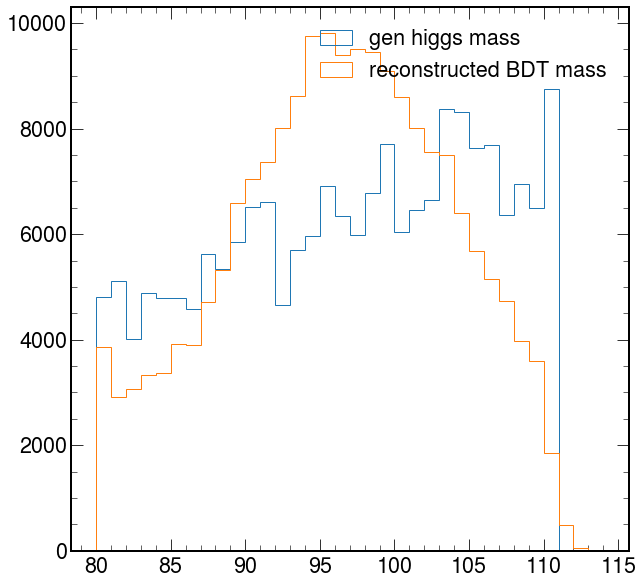

In [15]:
gen_hist.plot(label = "gen higgs mass")
nn_hist.plot(label = "reconstructed BDT mass")


In [16]:
gen_hist_test = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "gen_higgs_mass"].values, bins = np.arange(80, 115, 1))
nn_hist_test = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "bdt_ditau_mass"].values, bins = np.arange(80, 115, 1))

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


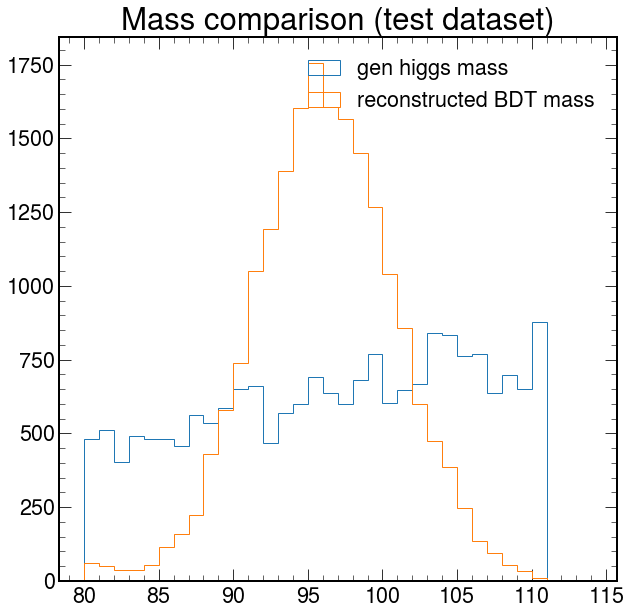

In [18]:
gen_hist_test.plot(label = "gen higgs mass")
nn_hist_test.plot(label = "reconstructed BDT mass")
plt.title("Mass comparison (test dataset)")
plt.savefig("bdt_restricted_range.pdf")

In [36]:
# Pull histograms
tau_flat_df = pd.read_pickle("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/MVAs/flat_higgs_20210609_bdt_predictions.pkl")
tau_flat_df_restricted = pd.read_pickle("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/MVAs/flat_higgs_20210609_bdt_predictions_restricted.pkl")

In [59]:
tau_flat_test = tau_flat_df.loc[tau_flat_df["train_label"] == 2]
tau_flat_test_restricted = tau_flat_df_restricted.loc[tau_flat_df_restricted["train_label"] == 2]

tau_flat_train = tau_flat_df.loc[tau_flat_df["train_label"] == 0]
tau_flat_train_restricted = tau_flat_df_restricted.loc[tau_flat_df_restricted["train_label"] == 0]

In [39]:
pull = (tau_flat_test["gen_higgs_mass"] - tau_flat_test["bdt_ditau_mass_weighted"])/tau_flat_test["gen_higgs_mass"]
pull_restricted = (tau_flat_test_restricted["gen_higgs_mass"] - tau_flat_test_restricted["bdt_ditau_mass"])/tau_flat_test_restricted["gen_higgs_mass"]

In [43]:
pull_hist = Hist1D(pull.values, bins = linspace(-1, 1, 100))
pull_hist_restricted = Hist1D(pull_restricted.values, bins = linspace(-1, 1, 100))

pull_hist /= pull_hist.integral
pull_hist_restricted /= pull_hist_restricted.integral

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


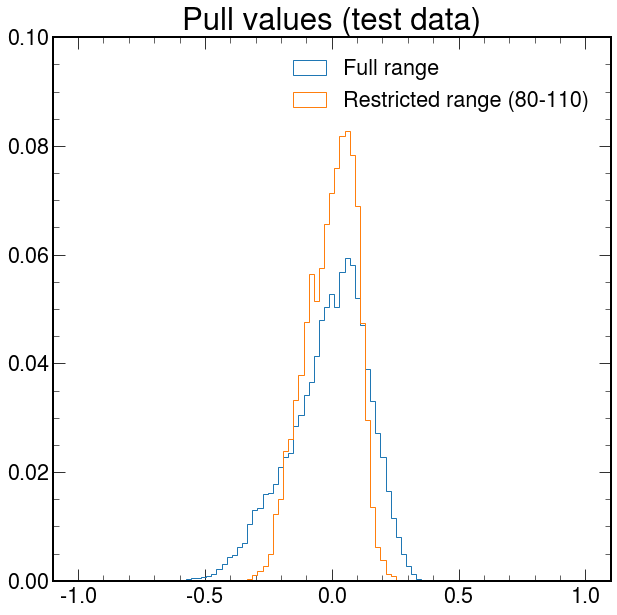

In [66]:
pull_hist.plot(label="Full range")
pull_hist_restricted.plot(label="Restricted range (80-110)")
plt.ylim([0,0.1])

plt.title("Pull values (test data)")
plt.savefig("BDT_pulls_test.pdf")

In [60]:
pull_train = (tau_flat_train["gen_higgs_mass"] - tau_flat_train["bdt_ditau_mass_weighted"])/tau_flat_train["gen_higgs_mass"]
pull_train_restricted = (tau_flat_train_restricted["gen_higgs_mass"] - tau_flat_train_restricted["bdt_ditau_mass"])/tau_flat_train_restricted["gen_higgs_mass"]

In [61]:
pull_train_hist = Hist1D(pull_train.values, bins = linspace(-1, 1, 100))
pull_train_hist_restricted = Hist1D(pull_train_restricted.values, bins = linspace(-1, 1, 100))

pull_train_hist /= pull_train_hist.integral
pull_train_hist_restricted /= pull_train_hist_restricted.integral

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


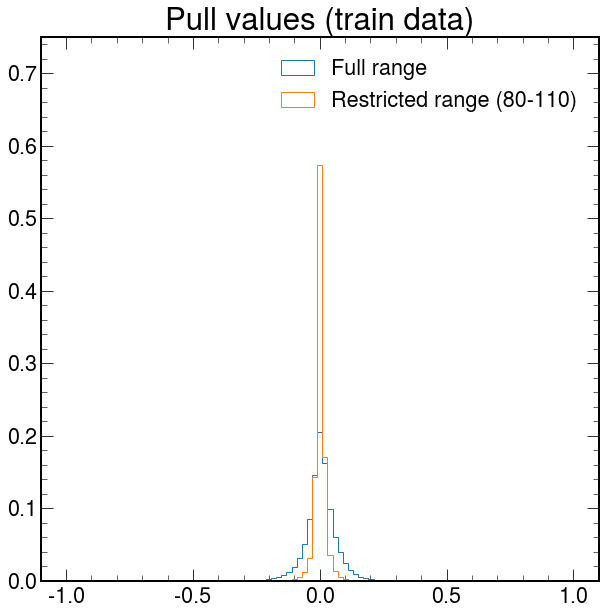

In [67]:
pull_train_hist.plot(label="Full range")
pull_train_hist_restricted.plot(label="Restricted range (80-110)")
plt.ylim([0,0.75])

plt.title("Pull values (train data)")
plt.savefig("BDT_pulls_train.pdf")

In [86]:
pull_hist.mean()

-0.013664833830755962

-0.009480897036736213

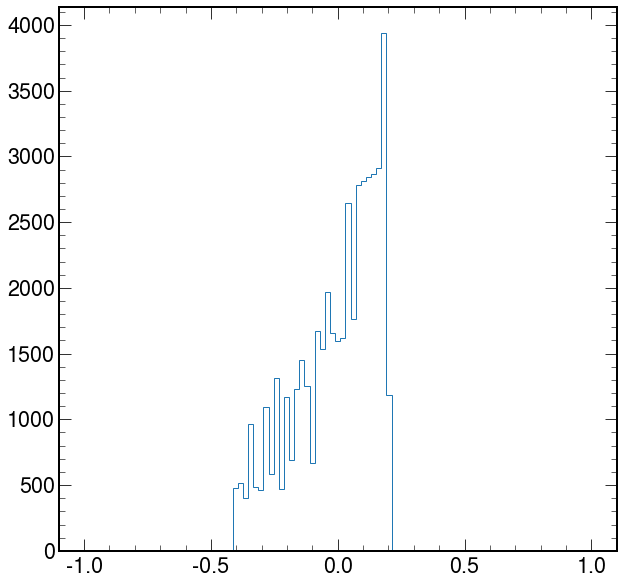

In [78]:
tempHist = Hist1D(((tau_flat_test["gen_higgs_mass"] - 112.34066772460938)/tau_flat_test["gen_higgs_mass"]).values, bins = linspace(-1, 1, 100))
tempHist.plot()

tempHist.mean()

In [76]:
Hist1D(tau_flat_test["bdt_ditau_mass"].values).mode()

112.34066772460938

In [19]:
tau_flat_df = pd.read_pickle("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/Preselection/output/singleH_nanoAOD_extended_mass_with_labels.pkl")

<AxesSubplot:>

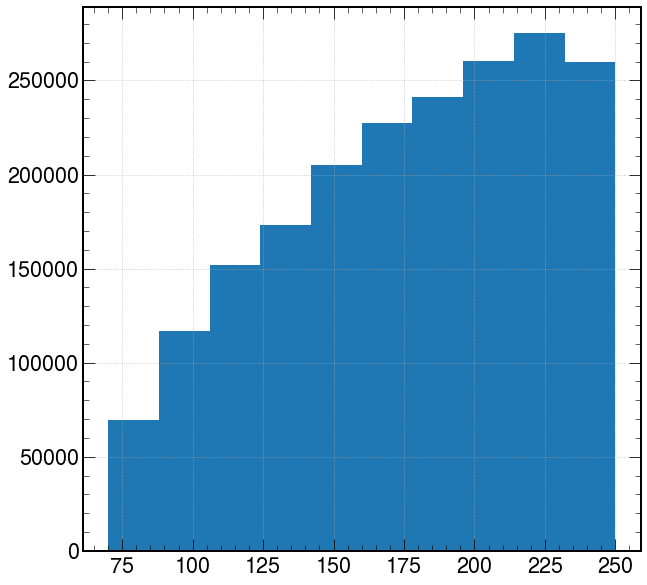

In [20]:
tau_flat_df["gen_higgs_mass"].hist()

In [21]:
tau_flat_df["weight"].max()

0.42354935430921614

<AxesSubplot:>

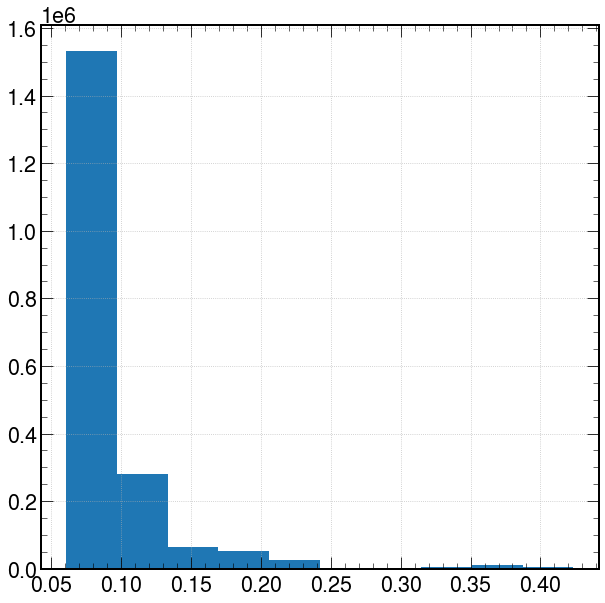

In [23]:
tau_flat_df["weight"].hist()

In [16]:
x = tau_flat_df.loc[tau_flat_df["gen_higgs_mass"] == (tau_flat_df["gen_higgs_mass"].astype(int32))]

In [17]:
x["gen_higgs_mass"].unique()

array([100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 151., 152., 153., 154.,
       155., 156., 157., 158., 159., 160., 161., 162., 163., 164., 165.,
       166., 167., 168., 169., 170., 171., 172., 173., 174., 175., 176.,
       177., 178., 179., 180., 181., 182., 183., 184., 185., 186., 187.,
       188., 189., 190., 191., 192., 193., 194., 195., 196., 197., 198.,
       199., 200., 201., 202., 203., 204., 205., 206., 207., 208., 209.,
       210., 211., 212., 213., 214., 215., 216., 217., 218., 219., 220.,
       221., 222., 223., 224., 225., 226., 227., 228., 229., 230., 231.,
       232., 233., 234., 235., 236., 237., 238., 239., 240., 241., 242.,
       243., 244., 245., 246., 247., 248., 249., 25

In [18]:
for higgsMass in x["gen_higgs_mass"].unique():
    print(higgsMass, len(x.loc[tau_flat_df["gen_higgs_mass"] == higgsMass]))

100.0 6788
101.0 6703
102.0 6859
103.0 7661
104.0 7713
105.0 7728
106.0 7871
107.0 7820
108.0 7653
109.0 7779
110.0 8091
111.0 8336
112.0 8449
113.0 8215
114.0 8199
115.0 8487
116.0 8729
117.0 8512
118.0 8977
119.0 8516
120.0 8187
121.0 8545
122.0 9726
123.0 9569
124.0 8889
125.0 9409
126.0 9010
127.0 9191
128.0 4530
129.0 9269
130.0 9525
131.0 9386
132.0 10308
133.0 10240
134.0 10329
135.0 10200
136.0 10351
137.0 10487
138.0 10398
139.0 10350
140.0 10935
141.0 10349
142.0 11172
143.0 10845
144.0 11094
145.0 10976
146.0 10896
147.0 11688
148.0 11548
149.0 11495
150.0 11555
151.0 11794
152.0 11782
153.0 11413
154.0 11488
155.0 12197
156.0 11046
157.0 12155
158.0 10913
159.0 10766
160.0 12230
161.0 10838
162.0 11792
163.0 11833
164.0 12781
165.0 12061
166.0 11998
167.0 12850
168.0 13171
169.0 13320
170.0 13075
171.0 12960
172.0 13344
173.0 12476
174.0 13161
175.0 13006
176.0 13030
177.0 13316
178.0 13560
179.0 13283
180.0 13251
181.0 12414
182.0 12783
183.0 13709
184.0 13963
185.0 13860


In [78]:
tau_flat_df = pd.read_pickle("../MVAs/singleH_extended_mass_with_BDT_mass.pkl")

In [81]:
from yahist import Hist1D
gen_hist_test = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "gen_higgs_mass"].values, bins = np.arange(70, 252, 1))
bdt_hist_test = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "mva_score"].values, bins = np.arange(70, 252, 1))
#nn_hist_test = Hist1D(tau_flat_nn_df.loc[tau_flat_nn_df["train_label"] == 2, "mva_score"].values, bins = np.arange(70, 252, 1))

In [94]:
gen_hist_test = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "gen_higgs_mass"].values, bins = np.arange(70, 252, 1))
gen_hist_test.bin_centers[gen_hist_test.counts == 0]

array([119.5, 123.5, 127.5, 168.5, 176.5, 184.5, 191.5])

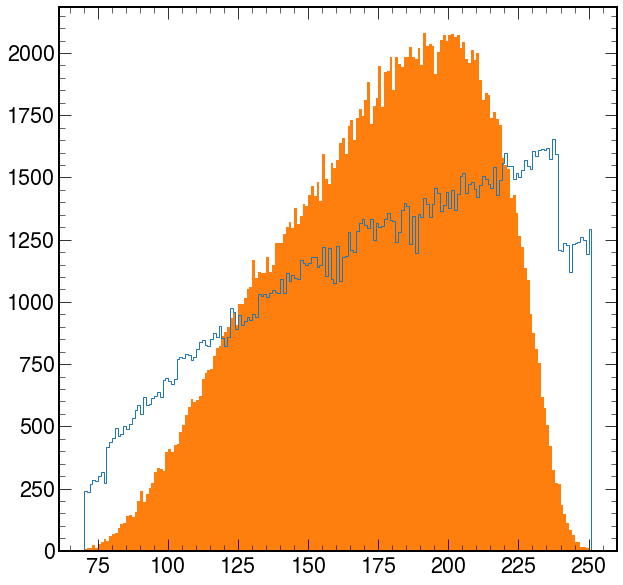

In [97]:
counts, bins, whatever = plt.hist(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "gen_higgs_mass"].values, bins = arange(70, 252, 1) ,histtype = "step")
counts, bins, whatever = plt.hist(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "mva_score"].values, bins = arange(70, 252, 1))

array([<AxesSubplot:title={'center':'mva_score'}>], dtype=object)

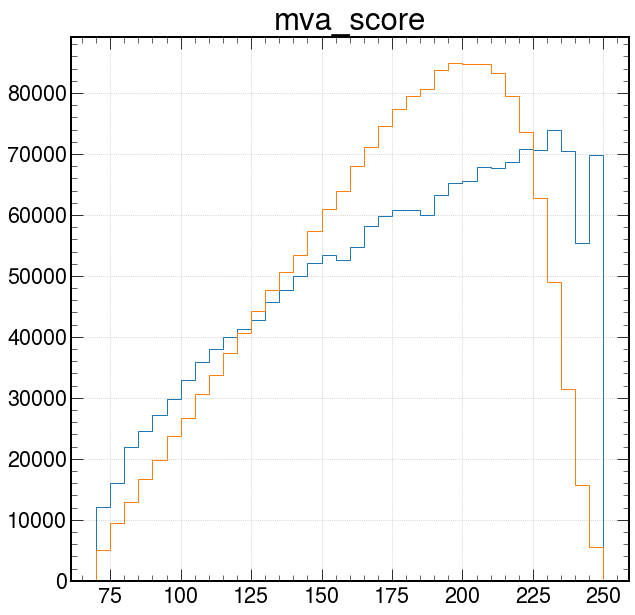

In [106]:
ax = tau_flat_df.loc[(tau_flat_df["train_label"] == 2) & (tau_flat_df["gen_higgs_mass"] % 5) == 0, ["gen_higgs_mass"]].hist(histtype="step", bins=np.arange(70, 255, 5))
tau_flat_df.loc[(tau_flat_df["train_label"] == 2) & (tau_flat_df["gen_higgs_mass"] % 5) == 0, ["mva_score"]].hist(histtype="step", bins=np.arange(70, 255, 5), ax = ax)

<AxesSubplot:>

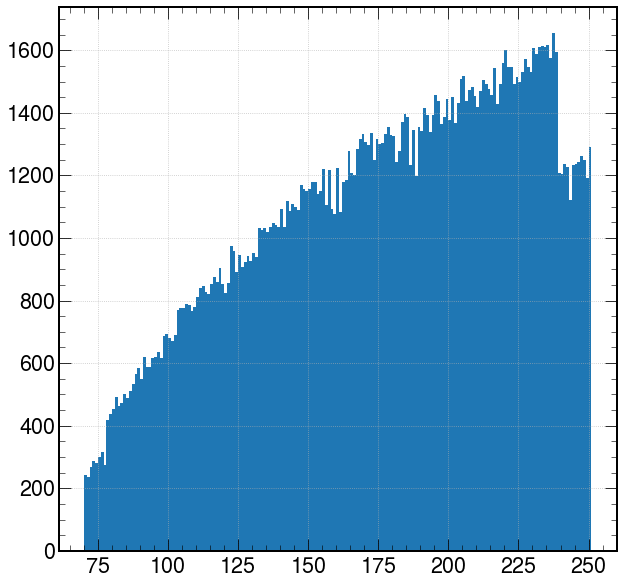

In [80]:
tau_flat_df.loc[tau_flat_df["train_label"] == 2, "gen_higgs_mass"].hist(bins = np.arange(70, 252, 1))


<AxesSubplot:>

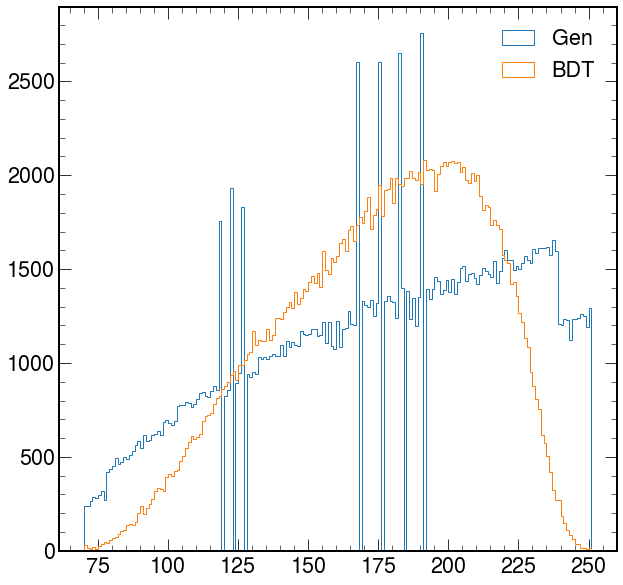

In [82]:
gen_hist_test.plot(label = "Gen")
bdt_hist_test.plot(label = "BDT")

In [50]:
x = pd.read_pickle("../Preselection/output/singleH_nanoAOD_extended_mass.pkl")

<AxesSubplot:>

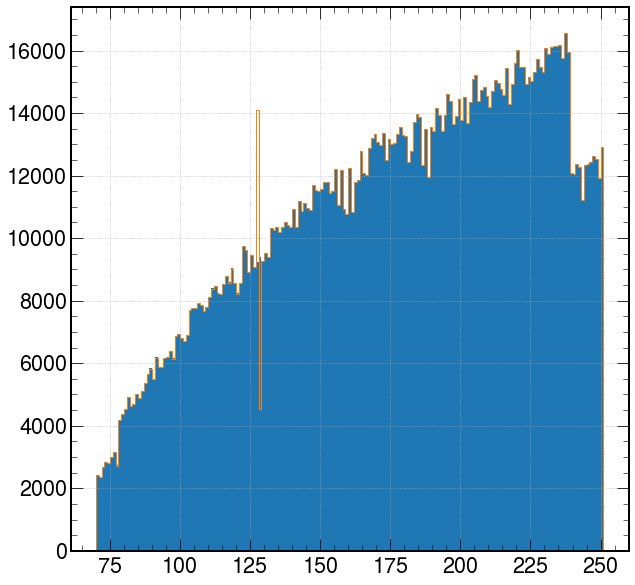

In [55]:
x["gen_higgs_mass_rounded"] = round(x["gen_higgs_mass"])
x["gen_higgs_mass_rounded"].hist(bins = np.arange(70, 252, 1))
x["gen_higgs_mass"].hist(histtype = "step", bins = np.arange(70, 252, 1))

In [70]:
x["gen_higgs_mass"] = round(x["gen_higgs_mass"])

<AxesSubplot:>

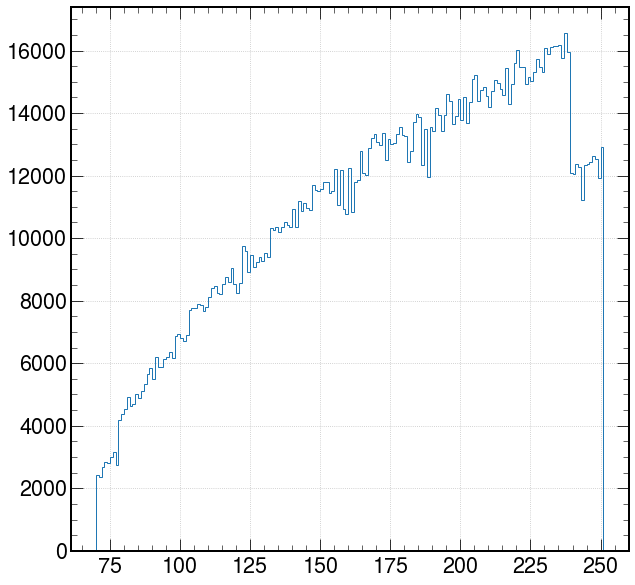

In [72]:
x["gen_higgs_mass"].hist(histtype = "step", bins = np.arange(70, 252, 1))

In [107]:
test_df = tau_flat_df.loc[tau_flat_df["train_label"] == 2]

In [108]:
from yahist import Hist2D

(<matplotlib.image.AxesImage at 0x7f68cc4d36d0>, <AxesSubplot:>)

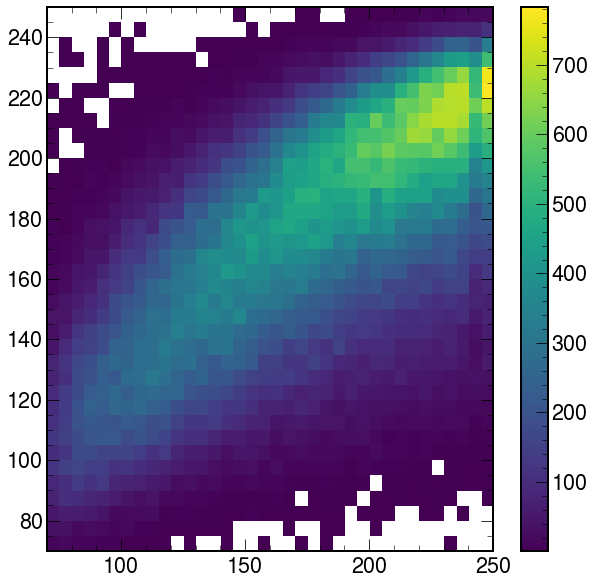

In [117]:
Hist2D(test_df[["gen_higgs_mass", "mva_score"]].values, bins = (arange(70, 255, 5), arange(70, 255, 5))).plot()

<AxesSubplot:>

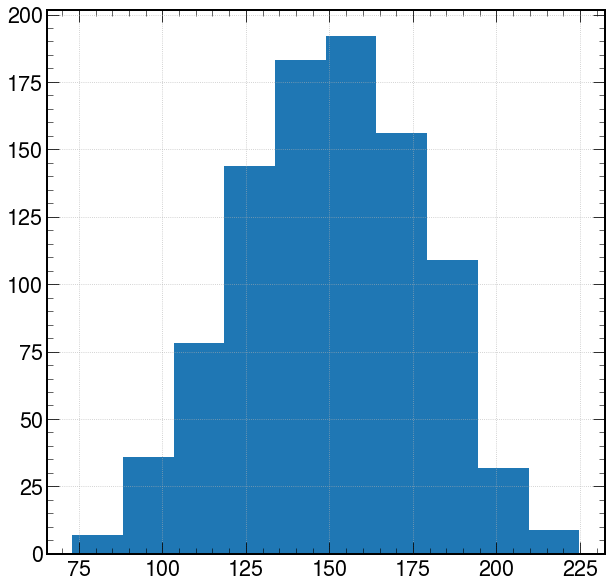

In [123]:
test_df.loc[test_df["gen_higgs_mass"] == 125, "mva_score"].hist()

In [112]:
np.histogram2d?

In [3]:
signal_mass_df = pd.read_pickle("../MVAs/HHggTauTau_with_NN_mass.pkl")
#signal_mass_df_BDT = pd.read_pickle("../MVAs/HHggTauTau_with_BDT_mass.pkl")

In [9]:
hh_hist = Hist1D(signal_mass_df.loc[(signal_mass_df["Category_pairsLoose"] > -1) & (signal_mass_df["process_id"] == -1), "mva_score"].values, bins=arange(50,250,5), label = "HH")
vh_hist = Hist1D(signal_mass_df.loc[(signal_mass_df["Category_pairsLoose"] > -1) & (signal_mass_df["process_id"] == 9), "mva_score"].values, bins=arange(50,250,5), label = "VH")

In [218]:
hh_hist_BDT = Hist1D(signal_mass_df_BDT.loc[(signal_mass_df_BDT["Category_pairsLoose"] > -1) & (signal_mass_df_BDT["process_id"] == -1), "mva_score"].values, weights=signal_mass_df_BDT.loc[(signal_mass_df_BDT["Category_pairsLoose"] > -1) & (signal_mass_df_BDT["process_id"] == -1), "weight"].values, bins=arange(50,250,5), label = "HH")
vh_hist_BDT = Hist1D(signal_mass_df_BDT.loc[(signal_mass_df_BDT["Category_pairsLoose"] > -1) & (signal_mass_df_BDT["process_id"] == 9), "mva_score"].values, weights=signal_mass_df_BDT.loc[(signal_mass_df_BDT["Category_pairsLoose"] > -1) & (signal_mass_df_BDT["process_id"] == 9), "weight"].values ,bins=arange(50,250,5), label = "VH")

In [10]:
hh_hist /= hh_hist.integral
vh_hist /= vh_hist.integral

<AxesSubplot:>

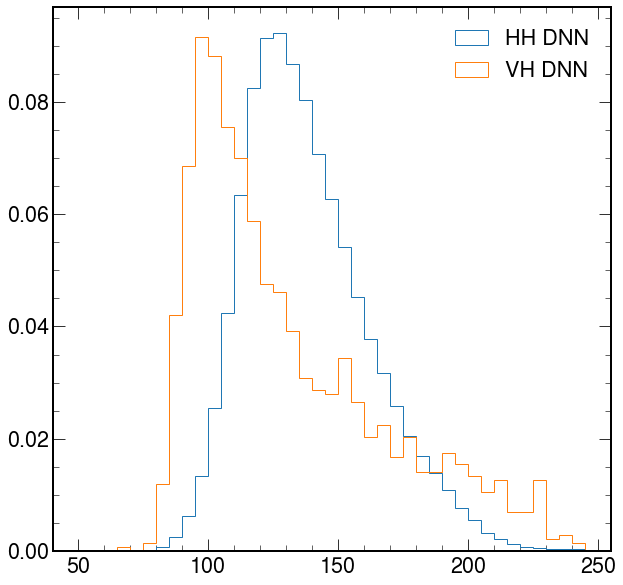

In [11]:
hh_hist.plot(label="HH DNN")
vh_hist.plot(label="VH DNN")

127.5

In [6]:
hh_hist_BDT /= hh_hist_BDT.integral
vh_hist_BDT /= vh_hist_BDT.integral

NameError: name 'hh_hist_BDT' is not defined

<AxesSubplot:>

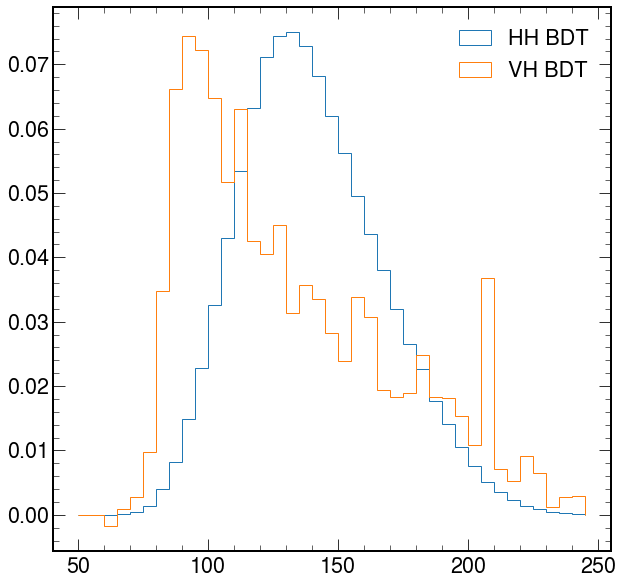

In [222]:
hh_hist_BDT.plot(label="HH BDT")
vh_hist_BDT.plot(label="VH BDT")

In [224]:
hh_hist_BDT.mean()

140.01632888714917

In [226]:
hh_hist_BDT.std()/hh_hist_BDT.mean()

0.19329798273202636

In [228]:
tau_flat_df = pd.read_pickle("../MVAs/singleH_extended_mass_with_BDT_mass.pkl")
gen_hist = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "gen_higgs_mass"].astype(float32), bins=arange(70,300,1))
bdt_hist = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2,"mva_score"], bins=arange(70,300,1))

<AxesSubplot:>

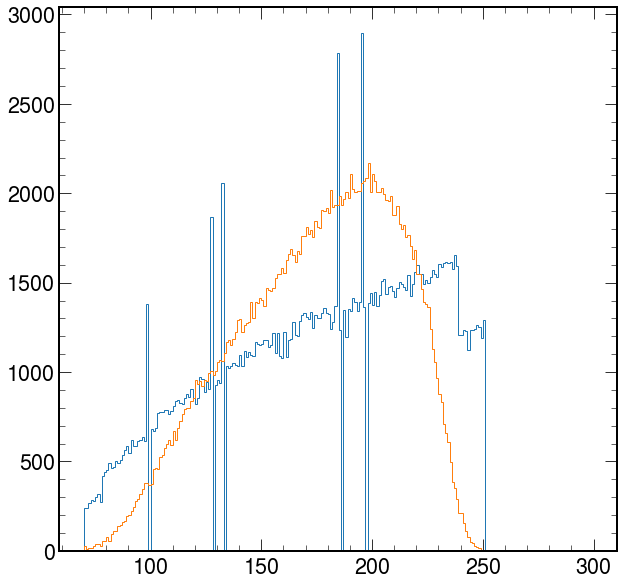

In [229]:
gen_hist.plot()
bdt_hist.plot()

<AxesSubplot:>

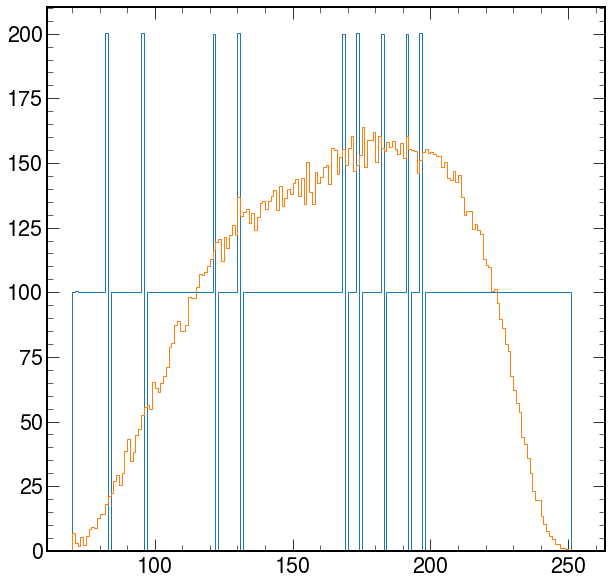

In [206]:
tau_flat_df = pd.read_pickle("../MVAs/singleH_extended_mass_with_BDT_mass.pkl")
Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "gen_higgs_mass"].astype(float32), weights=tau_flat_df.loc[tau_flat_df["train_label"] == 2, "weight"], bins=arange(70,255,1)).plot()
Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2,"mva_score"], weights=tau_flat_df.loc[tau_flat_df["train_label"] == 2, "weight"], bins=arange(70,255,1)).plot()

In [181]:
float(round(120.75))

121.0

In [232]:
tau_flat_df.loc[tau_flat_df["train_label"] == 0, "gen_higgs_mass"].std()

47.02642

In [234]:
tau_flat_df.loc[tau_flat_df["train_label"] == 0]

,nJet,MET_pt,MET_phi,MET_covXX,MET_covXY,MET_covYY,ele1_pt,ele1_eta,ele1_phi,ele1_charge,...,Category_onehot_1,Category_onehot_2,Category_onehot_3,Category_onehot_4,Category_onehot_5,process_id,weight,year,train_label,mva_score
0,7,36.559765,2.181641,382.0,-50.500000,372.0,-9.000000,-9.000000,-9.000000,0,...,0.0,1.0,0.0,0.0,0.0,-1.0,35900.001526,2016.0,0.0,122.381851
1,5,80.920158,2.315918,1416.0,-352.000000,586.0,-9.000000,-9.000000,-9.000000,0,...,0.0,1.0,0.0,0.0,0.0,-1.0,35900.001526,2016.0,0.0,103.917717
2,2,5.970786,2.791504,281.0,1.964844,335.0,-9.000000,-9.000000,-9.000000,0,...,0.0,0.0,0.0,0.0,0.0,-1.0,35900.001526,2016.0,0.0,134.436523
3,5,36.896252,-1.320557,546.0,-23.875000,550.0,-9.000000,-9.000000,-9.000000,0,...,0.0,0.0,0.0,0.0,0.0,-1.0,35900.001526,2016.0,0.0,108.836685
4,3,32.472801,3.009766,472.0,-11.031250,426.0,24.672115,0.279114,2.695312,1,...,1.0,0.0,0.0,0.0,0.0,-1.0,35900.001526,2016.0,0.0,108.157410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952689,3,31.266058,-1.682129,336.0,-13.593750,365.0,30.644106,-1.585449,-1.718506,1,...,1.0,0.0,0.0,0.0,0.0,-1.0,59799.999237,2018.0,0.0,89.881195
1952690,3,50.362911,1.402832,662.0,42.750000,540.0,-9.000000,-9.000000,-9.000000,0,...,0.0,0.0,0.0,0.0,0.0,-1.0,59799.999237,2018.0,0.0,90.955635
1952691,3,17.614820,-1.054199,536.0,22.812500,520.0,-9.000000,-9.000000,-9.000000,0,...,0.0,1.0,0.0,0.0,0.0,-1.0,59799.999237,2018.0,0.0,76.555443
1952692,4,78.508133,0.088577,694.0,-14.312500,670.0,10.158596,0.314697,1.076660,-1,...,0.0,0.0,0.0,0.0,1.0,-1.0,59799.999237,2018.0,0.0,75.379501


In [238]:
train_df= pd.read_hdf("../MVAs/singleH_nanoAOD_extended_mass_65pc_training.hdf5", "X_train")
train_df["gen_higgs_mass"] = pd.read_hdf("../MVAs/singleH_nanoAOD_extended_mass_65pc_training.hdf5", "y_train")

In [242]:
train_df.loc[train_df["gen_higgs_mass"] == 100.0]

,decay_1_pt,decay_1_eta,decay_1_phi,decay_1_energy,decay_1_mass,decay_2_pt,decay_2_eta,decay_2_phi,decay_2_energy,decay_2_mass,Category_onehot_1,Category_onehot_2,Category_onehot_3,Category_onehot_4,Category_onehot_5,MET_pt,MET_phi,m_tautau_vis,gen_higgs_mass
277,21.142887,-2.076660,2.299316,85.661760,0.000511,22.981750,0.030910,-0.632568,23.061285,1.776860,1.0,0.0,0.0,0.0,0.0,9.933619,0.611084,70.870066,100.0
655,49.144329,1.290527,-0.309326,96.089378,1.776860,25.855400,1.463623,2.135742,58.886437,1.776860,0.0,1.0,0.0,0.0,0.0,38.387215,0.269104,67.396045,100.0
1378,56.614361,-0.828369,2.916504,77.195527,1.776860,40.949665,-1.043457,-1.980469,65.364455,1.776860,0.0,1.0,0.0,0.0,0.0,57.887039,-2.634277,62.498467,100.0
1791,23.434889,-0.067413,-2.061035,23.488397,0.105658,23.794580,1.061279,3.007324,38.541549,1.776860,0.0,0.0,0.0,0.0,0.0,64.559776,-2.927246,38.997049,100.0
1794,38.437729,1.302979,-1.617188,75.952320,0.105658,31.645481,1.867188,1.909424,104.834884,1.776860,0.0,0.0,0.0,0.0,0.0,11.993789,-0.214905,71.347656,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288401,34.140621,-1.613525,-0.331787,89.118991,1.776860,20.294100,-0.440186,-3.094727,22.362881,1.776860,0.0,1.0,0.0,0.0,0.0,35.318562,-3.002441,61.330347,100.0
1288444,11.502149,-1.162109,2.265625,20.183642,0.105658,34.002728,-1.092285,-0.983276,56.413482,1.776860,0.0,0.0,0.0,0.0,0.0,21.877615,1.457764,39.574682,100.0
1288798,29.094080,1.561768,0.365479,72.422495,1.776860,23.839947,1.854004,-2.440918,78.000034,1.776860,0.0,1.0,0.0,0.0,0.0,32.277344,-0.140594,52.626093,100.0
1289023,48.031422,-0.329773,2.954102,50.667000,0.105658,21.863392,-0.156036,-0.721069,22.201309,1.776860,0.0,0.0,0.0,0.0,0.0,31.012794,-2.250488,62.854873,100.0


In [243]:
x = tau_flat_df.loc[tau_flat_df["train_label"] == 0, train_df.columns]

In [244]:
x.loc[x["gen_higgs_mass"] == 100.0]

,decay_1_pt,decay_1_eta,decay_1_phi,decay_1_energy,decay_1_mass,decay_2_pt,decay_2_eta,decay_2_phi,decay_2_energy,decay_2_mass,Category_onehot_1,Category_onehot_2,Category_onehot_3,Category_onehot_4,Category_onehot_5,MET_pt,MET_phi,m_tautau_vis,gen_higgs_mass
0,48.824291,-0.441467,-1.692871,53.689242,1.776860,34.588123,0.518799,1.665771,39.388301,1.776860,0.0,1.0,0.0,0.0,0.0,36.559765,2.181641,91.483641,100.0
1,208.002914,-0.292725,2.831543,216.985652,1.776860,25.976711,-0.906250,2.520996,37.436451,1.776860,0.0,1.0,0.0,0.0,0.0,80.920158,2.315918,51.386092,100.0
2,58.818733,0.472473,-1.710449,65.506937,0.105658,30.682121,0.420227,1.474121,33.478500,1.776860,0.0,0.0,0.0,0.0,0.0,5.970786,2.791504,85.027552,100.0
3,36.986866,-0.035484,0.712280,37.010305,0.105658,28.851849,-0.009001,-2.679199,28.907678,1.776860,0.0,0.0,0.0,0.0,0.0,36.896252,-1.320557,64.886359,100.0
4,24.672115,0.279114,2.695312,25.639405,0.000511,48.579605,0.750244,-0.491760,62.930048,1.776860,1.0,0.0,0.0,0.0,0.0,32.472801,3.009766,71.184313,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941492,24.316679,-2.199219,-2.725586,110.991771,0.105658,17.209381,-1.390381,-0.135468,36.702102,0.000511,0.0,0.0,0.0,0.0,1.0,59.607368,1.475098,42.882033,100.0
941493,12.938249,-0.471802,-1.205078,14.405554,0.105658,30.265272,-1.739502,2.952148,88.848075,1.776860,0.0,0.0,0.0,0.0,0.0,39.957603,1.585205,43.793985,100.0
941494,83.623474,0.112030,-2.615723,84.148791,0.000511,110.711205,0.654663,3.098145,135.306910,1.776860,1.0,0.0,0.0,0.0,0.0,90.422058,-2.485840,75.625928,100.0
941495,40.379059,-1.477295,2.974609,93.077222,1.776860,33.883492,-2.246094,-0.892334,161.914533,1.776860,0.0,1.0,0.0,0.0,0.0,29.937538,0.950317,75.145272,100.0


In [249]:
train_df.loc[(train_df["m_tautau_vis"] > 51.386) & (train_df["m_tautau_vis"] < 51.387)]

,decay_1_pt,decay_1_eta,decay_1_phi,decay_1_energy,decay_1_mass,decay_2_pt,decay_2_eta,decay_2_phi,decay_2_energy,decay_2_mass,Category_onehot_1,Category_onehot_2,Category_onehot_3,Category_onehot_4,Category_onehot_5,MET_pt,MET_phi,m_tautau_vis,gen_higgs_mass
173310,19.219730,0.436157,0.449829,21.077275,0.105658,22.461386,-0.911987,-2.618164,32.516401,1.776860,0.0,0.0,0.0,0.0,0.0,72.323265,-3.126953,51.386697,135.0
176284,18.848375,-0.013020,2.037109,18.849973,0.000511,38.941078,0.066544,-1.760498,39.067755,1.776860,1.0,0.0,0.0,0.0,0.0,59.140663,2.157227,51.386093,134.0
255104,13.538818,-2.098633,-2.937988,56.034810,0.105658,37.979755,-1.031494,-0.155640,60.067116,1.776860,0.0,0.0,0.0,0.0,0.0,42.905701,-2.683594,51.386444,141.0
298566,18.518547,0.953247,0.472412,27.589195,0.105658,28.079458,-0.075226,-2.371094,28.214951,1.776860,0.0,0.0,0.0,0.0,0.0,51.240841,-1.018066,51.386948,84.0
474671,11.596245,0.372803,0.311523,12.411905,0.105658,15.043764,-2.207520,-2.452148,69.224680,0.000511,0.0,0.0,0.0,0.0,1.0,60.082775,-1.558838,51.386457,177.0
633450,34.084229,-0.603394,-2.343262,40.479678,0.105658,23.148012,-1.192139,1.851318,41.639821,0.105658,0.0,0.0,1.0,0.0,0.0,11.143343,0.272827,51.386132,90.0
694576,11.542737,-0.270508,1.543945,11.968102,0.105658,23.160826,1.780273,-1.398682,70.663674,1.776860,0.0,0.0,0.0,0.0,0.0,70.340355,1.213867,51.386543,157.0
701103,10.180419,1.595459,-1.200684,26.130117,0.000511,25.626831,-0.852051,-1.888184,35.550269,1.776860,1.0,0.0,0.0,0.0,0.0,90.436272,-1.588379,51.386595,193.0
880746,18.389709,0.953735,0.472229,27.407173,0.105658,28.267500,-0.075378,-2.371094,28.403477,1.776860,0.0,0.0,0.0,0.0,0.0,82.018105,1.893799,51.386048,84.0
886279,20.577833,-0.016376,0.865356,20.580864,0.105658,26.639322,-0.948486,-2.632324,39.587643,1.776860,0.0,0.0,0.0,0.0,0.0,59.625858,-2.863770,51.386233,145.0


In [68]:
signal_mass_df = pd.read_pickle("../MVAs/HHggTauTau_with_DNN_weighted_mass.pkl")
hh_hist = Hist1D(signal_mass_df.loc[(signal_mass_df["Category_pairsLoose"] != -1) & (signal_mass_df["Category_pairsLoose"] <= 3) & (signal_mass_df["process_id"] == -1), "mva_score"].values, weights=signal_mass_df.loc[(signal_mass_df["Category_pairsLoose"] != -1) & (signal_mass_df["Category_pairsLoose"] <= 3) & (signal_mass_df["process_id"] == -1), "weight"].values, bins=arange(50,250,5), label = "HH")
vh_hist = Hist1D(signal_mass_df.loc[(signal_mass_df["Category_pairsLoose"] != -1) & (signal_mass_df["process_id"] == 9), "mva_score"].values, bins=arange(50,250,5), label = "VH")

<AxesSubplot:>

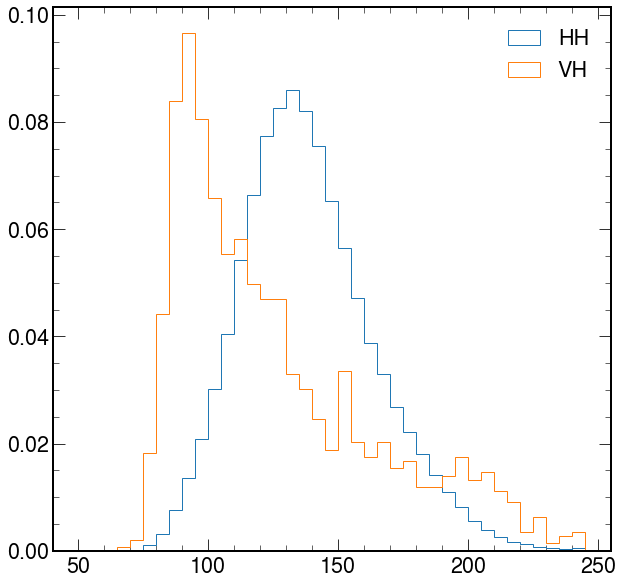

In [69]:
hh_hist /= hh_hist.integral
vh_hist /= vh_hist.integral
hh_hist.plot()
vh_hist.plot()

In [70]:
hh_hist.std()/hh_hist.mean()

0.18410105934856105

In [25]:
signal_mass_df["Category_pairsLoose"].unique()

array([ 3, -1,  1,  2,  5,  6,  4], dtype=int32)

In [76]:
tau_flat_df = pd.read_pickle("../MVAs/singleH_extended_mass_with_DNN_mass.pkl")
gen_hist = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "gen_higgs_mass"].astype(float32), weights=tau_flat_df.loc[tau_flat_df["train_label"] == 2, "weight"], bins=arange(70,260,5))
reco_hist = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2,"mva_score"], weights=tau_flat_df.loc[tau_flat_df["train_label"] == 2, "weight"], bins=arange(70,260,5))

<AxesSubplot:>

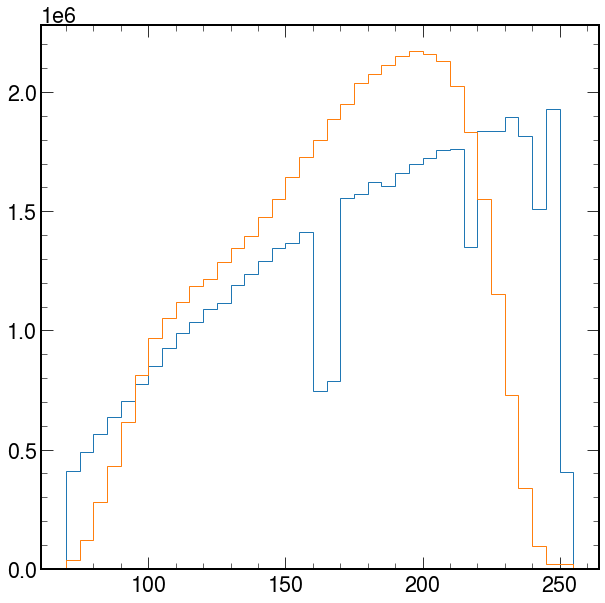

In [77]:
gen_hist.plot()
reco_hist.plot()

(<matplotlib.image.AxesImage at 0x7f7417213d90>, <AxesSubplot:>)

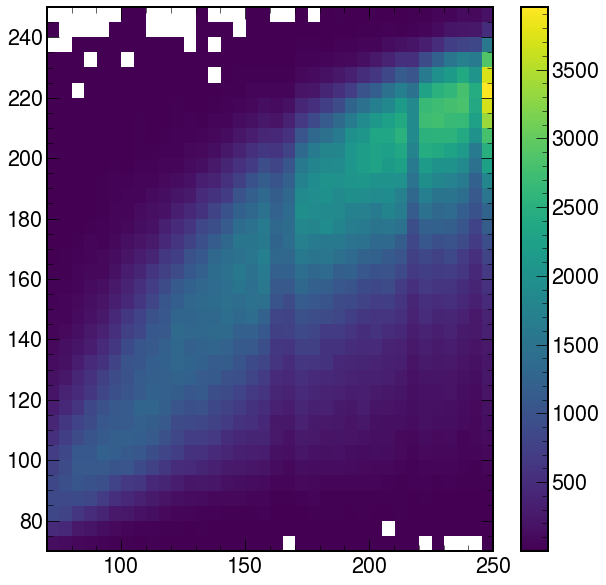

In [78]:
from yahist import Hist2D
x = Hist2D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, ["gen_higgs_mass", "mva_score"]].values, bins=(arange(70,255,5), arange(70,255,5)))
x.plot()